In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#  Importing data

In [2]:
#Importing files

ld1 = pd.read_csv('loan_data_2007_2014.csv', index_col = 0) #index_col = 0, will use first column as index in dataframe
ld2 = pd.read_csv('loan_data_2015.csv')

C:\Users\modza\AppData\Local\Temp\ipykernel_20264\4239686483.py:3: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  ld1 = pd.read_csv('loan_data_2007_2014.csv', index_col = 0) #index_col = 0, will use first column as index in dataframe
C:\Users\modza\AppData\Local\Temp\ipykernel_20264\4239686483.py:4: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  ld2 = pd.read_csv('loan_data_2015.csv')


## Basic data information

In [3]:
print('total number of rows and columns for dataset1 ld1: ', ld1.shape)
print('total number of rows and columns for dataset2 ld2: ', ld2.shape)

total number of rows and columns for dataset1 ld1:  (466285, 74)
total number of rows and columns for dataset2 ld2:  (421094, 74)


In [4]:
ld1.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
ld2.tail(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
421092,36490806,39222577,12000,12000,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN
421093,36271262,38982659,20000,20000,20000.0,36 months,11.99,664.20,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,41700.0,NaN,NaN,NaN


In [6]:
df = pd.concat([ld1, ld2])

In [7]:
df.reset_index(drop =True,inplace= True)


### dataset shape

In [8]:
df.shape

(887379, 74)

# Note:- 

* We are trimming our taget column at starting to reduce unwanted datas and to work smoothly with a limited computing resources.

#### In our project, we are mainly focused on predicting True Negatives, like given info about a customer, model needs to predict that whether they are going to default or not, so we will only keep, three values out of 10,and they are as follows:

Fully Paid

Charged off

Default

In [9]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

In [10]:
df.drop(df[df['loan_status'].isin(['Current', 
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'])].index,inplace = True)

In [11]:
df.reset_index(drop = True,inplace = True)

In [12]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Default'], dtype=object)

In [13]:
df.replace('Charged Off','Default',inplace = True)

## Datatype verification

In [14]:
pd.set_option('display.max_colwidth',None)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254190 entries, 0 to 254189
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           254190 non-null  int64  
 1   member_id                    254190 non-null  int64  
 2   loan_amnt                    254190 non-null  int64  
 3   funded_amnt                  254190 non-null  int64  
 4   funded_amnt_inv              254190 non-null  float64
 5   term                         254190 non-null  object 
 6   int_rate                     254190 non-null  float64
 7   installment                  254190 non-null  float64
 8   grade                        254190 non-null  object 
 9   sub_grade                    254190 non-null  object 
 10  emp_title                    240180 non-null  object 
 11  emp_length                   244222 non-null  object 
 12  home_ownership               254190 non-null  object 
 13 

## Conclusion

1) 74 columns info are being displayed over there, their non-null values count and datatypes respectively. While looking over the table it can be easily spotted that almost 17- 18 columns have more than 95% of missing values, So we are going to drop them right away.
2) and, for datattype verification, its a bit tedious task to verify by going through it, so we are going for an indepth data verification after droping columns with large number of missing values.

## Duplicated value check

In [16]:
df.duplicated().sum()

0

#  NOTE:-  Here we are performing a null value check, instead of dataype conversion, "we can't change the datatype with null value presence , so we have to get rid of those missing values prior to perform any conversion".

## Missing value check

In [17]:
mv = pd.DataFrame({'mv_count':df.isnull().sum(),
                                'percent_missing':df.isnull().sum()/len(df) *100}
                              ).sort_values(by = ['percent_missing'], ascending = False)
mv.head(25)

,mv_count,percent_missing
dti_joint,254189,99.999607
verification_status_joint,254189,99.999607
annual_inc_joint,254189,99.999607
il_util,254064,99.950431
mths_since_rcnt_il,254050,99.944923
open_acc_6m,254046,99.943349
open_il_6m,254046,99.943349
open_il_12m,254046,99.943349
open_il_24m,254046,99.943349
total_bal_il,254046,99.943349


In [18]:
print('Total no of columns having null values more than 55% are: ',len(mv[mv['percent_missing'].gt(56)]),
'\n', ' ', 'total number of columns in dataset: ', df.shape[1])

Total no of columns having null values more than 55% are:  21 
   total number of columns in dataset:  74


### 21 columns in our dataset has more than 56% of missing values present in them, and out of 21 columns, only 1 column has less than 81% missing valuues.
So we are going to drop all the columns having more than 56% of values present in them.

In [19]:
df.drop(mv[mv['percent_missing'].gt(56)].index, axis = 1, inplace = True)

### Checkpoint

In [20]:
new= df.copy()

In [21]:
new_mv = pd.DataFrame({'mv_count':df.isnull().sum(),
                                'percent_missing':df.isnull().sum()/len(df) *100}
                              ).sort_values(by = ['percent_missing'], ascending = False).head(12)
new_mv.head(12)

,mv_count,percent_missing
mths_since_last_delinq,141446,55.645777
tot_coll_amt,63726,25.070223
total_rev_hi_lim,63726,25.070223
tot_cur_bal,63726,25.070223
emp_title,14010,5.511625
emp_length,9968,3.921476
last_pymnt_d,536,0.210866
revol_util,200,0.078681
collections_12_mths_ex_med,56,0.022031
last_credit_pull_d,21,0.008262


In [22]:
for i in new_mv.index:
    print(df[i].dtypes)

float64
float64
float64
float64
object
object
object
float64
float64
object
object
float64


In [23]:
for row in ['title','emp_length','last_pymnt_d','last_credit_pull_d']:
    df[row].fillna(df[row].mode()[0],inplace = True)

In [24]:
for row in new_mv.index[:12]:
    if df[row].dtypes in ['float64','int64']:
        df[row].fillna(df[row].median(),inplace = True)
    else:
        pass 
    

In [25]:
df.shape

(254190, 53)

#### Note: 
As the information present in above cell is a bit confusing and there is a chance of making errors, we will go for an indepth datatype verification.

# Datatype Correction

####  Creating a dataframe having column names of our dataset as values in index column and their datatypes as values in other one.

In [26]:
#creating a dataframe having variables and their datatypes in seperate columns

df_d = pd.DataFrame(df.dtypes)          #dataframe for datatypes as read by system
df_d.reset_index(inplace = True)
df_d.head(5)

,index,0
0,id,int64
1,member_id,int64
2,loan_amnt,int64
3,funded_amnt,int64
4,funded_amnt_inv,float64


## importing original csv file containing variables and thier actual datatypes along with their descriptions

In [27]:
#importing original csv file containing variables and thier actual datatypes along with their descriptions
d = pd.read_excel('lclub.xlsx', index_col = 0) #d ---- dataframe for data dictionary hosted on website
d.head()
#concatenating 
merged_df = df_d.merge(d, left_on='index', right_on='index', how='inner')

merged_df.head()

,index,0,data_types,description
0,id,int64,obj,A unique LC assigned ID for the loan listing.
1,member_id,int64,obj,A unique LC assigned ID for the borrower member.
2,loan_amnt,int64,int64,The listed amount of the loan applied for by the borrower.
3,funded_amnt,int64,int64,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,float64,The total amount committed by investors for that loan at that point in time.


In [28]:
merged_df.shape

(53, 4)

In [29]:
#changing the column name 

merged_df.rename(columns = {0 : 'env_dtype'},inplace = True)
merged_df.head()

,index,env_dtype,data_types,description
0,id,int64,obj,A unique LC assigned ID for the loan listing.
1,member_id,int64,obj,A unique LC assigned ID for the borrower member.
2,loan_amnt,int64,int64,The listed amount of the loan applied for by the borrower.
3,funded_amnt,int64,int64,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,float64,The total amount committed by investors for that loan at that point in time.


In [30]:
for col in merged_df[['env_dtype','data_types']]:
    print('unique values presnt in : ',col, ' ', merged_df[col].unique())

unique values presnt in :  env_dtype   [dtype('int64') dtype('float64') dtype('O')]
unique values presnt in :  data_types   ['obj' 'int64' 'float64' 'obj/cat' 'yearmonth' 'object' 'categorical']


In [31]:
merged_df['data_types'].replace(['obj','obj/cat','categorical'],['object','object','object'], inplace = True)

In [32]:
cd_n = merged_df.copy()

In [33]:
print('Total column having correct datatypes are: ', len(merged_df[merged_df['data_types'].eq(merged_df['env_dtype'])]))
print()
print(merged_df[merged_df['data_types'].eq(merged_df['env_dtype'])].head(5))

Total column having correct datatypes are:  38

             index env_dtype data_types  \
2        loan_amnt     int64      int64   
3      funded_amnt     int64      int64   
4  funded_amnt_inv   float64    float64   
5             term    object     object   
6         int_rate   float64    float64   

                                                                            description  
2                            The listed amount of the loan applied for by the borrower.  
3                        The total amount committed to that loan at that point in time.  
4          The total amount committed by investors for that loan at that point in time.  
5  The number of payments on the loan. Values are in months and can be either 36 or 60.  
6                                                        The interest rate on the loan.  


### Following variables have incorrect datatype, we will convert the data into their desired format.

In [34]:
print('Total number of column having incorrect datatypes are: ', len(merged_df[~merged_df['data_types'].eq(merged_df['env_dtype'])]))
print()
print(merged_df[~merged_df['data_types'].eq(merged_df['env_dtype'])]) #.head(5))

Total number of column having incorrect datatypes are:  15

                         index env_dtype data_types  \
0                           id     int64     object   
1                    member_id     int64     object   
15                     issue_d    object  yearmonth   
24                 delinq_2yrs   float64      int64   
25            earliest_cr_line    object  yearmonth   
26              inq_last_6mths   float64     object   
27      mths_since_last_delinq   float64     object   
28                    open_acc   float64      int64   
29                     pub_rec   float64      int64   
32                   total_acc   float64      int64   
43                last_pymnt_d    object  yearmonth   
45          last_credit_pull_d    object  yearmonth   
46  collections_12_mths_ex_med   float64      int64   
47                 policy_code     int64     object   
49              acc_now_delinq   float64      int64   

                                                           

### Note: - creating a dictionary, having 'variable' as key and their top 5 'unique_values' as value, to use this dictionary in our datatype dataframe


In [35]:
# creating a dictionary, having 'variable' as key and their top 5 'unique_values' as value, to use this dictionary in our datatype dataframe

unique_values_dict = {}
for i in df.columns:
    unique_values = list(pd.Series(df[i].unique()))
    uv = unique_values[:5]
    #lis1.append(unique_values[:5])
    unique_values_dict[i] = uv

In [36]:
#creating a new column corresponging to the variables present in the index column
merged_df['uniq_va'] = merged_df['index'].map(unique_values_dict)

In [37]:
merged_df.sample(5)

,index,env_dtype,data_types,description,uniq_va
14,verification_status,object,object,Indicates if income was verified by LC not verified or if the income source was verified.,"[Verified, Source Verified, Not Verified]"
44,last_pymnt_amnt,float64,float64,Last total payment amount received.,"[171.62, 119.66, 649.91, 357.48, 161.03]"
34,out_prncp,float64,float64,Remaining outstanding principal for the total amount funded.,"[0.0, 6405.39, 5979.46, 1399.77, 3957.98]"
35,out_prncp_inv,float64,float64,Remaining outstanding principal for the portion of the total amount funded by investors.,"[0.0, 6396.45, 5972.37, 1399.77, 3957.98]"
24,delinq_2yrs,float64,int64,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.,"[0.0, 2.0, 3.0, 1.0, 4.0]"


## Note:- creating a new datfarame using 'datatype' datfarame for column having 'incorrect datatypes'

In [38]:
inmerged_df = merged_df[~merged_df['data_types'].eq(merged_df['env_dtype'])]
inmerged_df.head()

,index,env_dtype,data_types,description,uniq_va
0,id,int64,object,A unique LC assigned ID for the loan listing.,"[1077501, 1077430, 1077175, 1076863, 1075269]"
1,member_id,int64,object,A unique LC assigned ID for the borrower member.,"[1296599, 1314167, 1313524, 1277178, 1311441]"
15,issue_d,object,yearmonth,The month which the loan was funded.,"[Dec-11, Nov-11, Oct-11, Sep-11, Aug-11]"
24,delinq_2yrs,float64,int64,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.,"[0.0, 2.0, 3.0, 1.0, 4.0]"
25,earliest_cr_line,object,yearmonth,The month the borrower's earliest reported credit line was opened.,"[Jan-85, Apr-99, Nov-01, Feb-96, Nov-04]"


In [39]:
inmerged_df[inmerged_df['data_types'].eq('yearmonth')]

,index,env_dtype,data_types,description,uniq_va
15,issue_d,object,yearmonth,The month which the loan was funded.,"[Dec-11, Nov-11, Oct-11, Sep-11, Aug-11]"
25,earliest_cr_line,object,yearmonth,The month the borrower's earliest reported credit line was opened.,"[Jan-85, Apr-99, Nov-01, Feb-96, Nov-04]"
43,last_pymnt_d,object,yearmonth,Last month payment was received.,"[Jan-15, Apr-13, Jun-14, Apr-12, Nov-12]"
45,last_credit_pull_d,object,yearmonth,The most recent month LC pulled credit for this loan.,"[Jan-16, Sep-13, Jan-15, Sep-15, Dec-14]"


In [40]:
for col in ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']:
    df[col] = pd.to_datetime(df[col], format='%b-%y', errors='coerce')

In [41]:
df1 = df.copy()

In [42]:
for i in inmerged_df['index']:
    
    data_type_value = inmerged_df.loc[inmerged_df['index'] == i, 'data_types'].iloc[0]
    if data_type_value in ['int64', 'object']:
        
        if data_type_value in ['int64']:
            df[i] = df[i].astype(data_type_value)
        else:
            df[i] = df[i].astype(data_type_value)
            
    else:
        print(f"Invalid data type value '{data_type_value}' for index '{i}'. Skipping conversion.")
        continue  

Invalid data type value 'yearmonth' for index 'issue_d'. Skipping conversion.
Invalid data type value 'yearmonth' for index 'earliest_cr_line'. Skipping conversion.
Invalid data type value 'yearmonth' for index 'last_pymnt_d'. Skipping conversion.
Invalid data type value 'yearmonth' for index 'last_credit_pull_d'. Skipping conversion.


In [43]:
df_= pd.DataFrame(df.dtypes)          #dataframe for datatypes as read by system
df_.reset_index(inplace = True)
df_.head(5)

,index,0
0,id,object
1,member_id,object
2,loan_amnt,int64
3,funded_amnt,int64
4,funded_amnt_inv,float64


In [44]:
d = pd.read_excel('lclub.xlsx', index_col = 0) #d ---- dataframe for data dictionary hosted on website

#concatenating 
merged_ = df_.merge(d, left_on='index', right_on='index', how='inner')

In [45]:
merged_.rename(columns = {0 : 'env_dtype'},inplace = True)
merged_.head()

,index,env_dtype,data_types,description
0,id,object,obj,A unique LC assigned ID for the loan listing.
1,member_id,object,obj,A unique LC assigned ID for the borrower member.
2,loan_amnt,int64,int64,The listed amount of the loan applied for by the borrower.
3,funded_amnt,int64,int64,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,float64,The total amount committed by investors for that loan at that point in time.


In [46]:
for col in merged_[['env_dtype','data_types']]:
    print('unique values presnt in : ',col, ' ', merged_[col].unique())

unique values presnt in :  env_dtype   [dtype('O') dtype('int64') dtype('float64') dtype('<M8[ns]')]
unique values presnt in :  data_types   ['obj' 'int64' 'float64' 'obj/cat' 'yearmonth' 'object' 'categorical']


In [47]:
merged_['data_types'].replace(['obj','obj/cat','categorical'],['object','object','object'], inplace = True)

In [48]:
print('Total number of column having incorrect datatypes are: ', len(merged_[~merged_['data_types'].eq(merged_['env_dtype'])]))
print()
print(merged_[~merged_['data_types'].eq(merged_['env_dtype'])])

Total number of column having incorrect datatypes are:  4

                 index       env_dtype data_types  \
15             issue_d  datetime64[ns]  yearmonth   
25    earliest_cr_line  datetime64[ns]  yearmonth   
43        last_pymnt_d  datetime64[ns]  yearmonth   
45  last_credit_pull_d  datetime64[ns]  yearmonth   

                                                           description  
15                                The month which the loan was funded.  
25  The month the borrower's earliest reported credit line was opened.  
43                                    Last month payment was received.  
45               The most recent month LC pulled credit for this loan.  


## Conclusion: Datatype verification 
Now we have all the variables in desired format

In [49]:
df.shape

(254190, 53)

In [50]:
new = df.copy()

##  Converting target column into encoded form

In [51]:
df['loan_status'].head(2)

0    Fully Paid
1       Default
Name: loan_status, dtype: object

In [52]:
df['loan_status'].replace({'Fully Paid':0,'Default':1},inplace = True)

In [54]:
df.loan_status

0         0
1         1
2         0
3         0
4         0
         ..
254185    1
254186    0
254187    0
254188    0
254189    1
Name: loan_status, Length: 254190, dtype: int64

In [55]:
df1 = df.copy()

target = pd.get_dummies(df['loan_status'],drop_first = True)  #Default = 0, fully_paid = 1
target.head(2)

df1 = pd.concat([df,target], axis =1)
df1.head(2)

df1.rename(columns = {'Fully Paid':'target_loan_status'}, inplace = True)

## Describing dataset

######  Variable bifurcation into - numeric and categorical

In [56]:
numeric = df1.select_dtypes(include = ['float64','int64'])
cat = df1.select_dtypes(include = ['object'])

In [57]:
for i in cat.columns:
    print(cat[i].value_counts().head())
    print()
    print('No. of unique values: ',cat[i].nunique())

id
1077501     1
29754505    1
30425697    1
30435850    1
30545760    1
Name: count, dtype: int64

No. of unique values:  254190
member_id
1296599     1
32277699    1
32968870    1
32989029    1
33098947    1
Name: count, dtype: int64

No. of unique values:  254190
term
 36 months    197373
 60 months     56817
Name: count, dtype: int64

No. of unique values:  2
grade
B    76263
C    65680
A    42343
D    40818
E    19387
Name: count, dtype: int64

No. of unique values:  7
sub_grade
B3    18106
B4    16992
C1    15023
B2    14654
C2    14419
Name: count, dtype: int64

No. of unique values:  35
emp_title
Manager             1959
Teacher             1927
Supervisor           863
Registered Nurse     848
RN                   844
Name: count, dtype: int64

No. of unique values:  133189
emp_length
10+ years    87224
2 years      23647
< 1 year     20975
3 years      20484
5 years      18136
Name: count, dtype: int64

No. of unique values:  11
home_ownership
MORTGAGE    125342
RENT        1

In [58]:
cat.describe().T

,count,unique,top,freq
id,254190,254190,1077501,1
member_id,254190,254190,1296599,1
term,254190,2,36 months,197373
grade,254190,7,B,76263
sub_grade,254190,35,B3,18106
emp_title,240180,133189,Manager,1959
emp_length,254190,11,10+ years,87224
home_ownership,254190,6,MORTGAGE,125342
verification_status,254190,3,Verified,93375
pymnt_plan,254190,2,n,254188


* policy_code
* application_type
* url
* pymnt plan
* id

### Note:- Please check the insights given below before looking at the dropped columns

In [1225]:
df1.drop(['id','member_id','url','policy_code','pymnt_plan','application_type', 'acc_now_delinq','collections_12_mths_ex_med'],axis = 1,inplace = True)

In [1291]:
cat.drop(['id','member_id','url','policy_code','pymnt_plan','application_type', 'acc_now_delinq','collections_12_mths_ex_med'],axis = 1,inplace = True)

In [1229]:
df1.shape

(254190, 46)

# Insights

* On examining the the above table, 

* Almost, 75% of loan has a term of 36 months.
* B grade is the most frequent grade assigned by LendingClub with a total number of 76K, which is somewhere around 33%,and same goes for sub grade which has B3 as most frequent.

# Id, member_id, url - Completely Unique values

1) We can see clearly that id and member id has complete unique values, which is obvious because of its use case, and same for url column,data in url column is an link which possibly refers to the landing page/login page/dashboard that a user gets access using credentials given by LendingClub.

# Purpose, title - Seems to have same values

3) Purpose and title column looks similar with only difference in number of their unique values, will look closely in further analysis.

# Grade , Subgrade - grade seems to be further classified in subgrade 

4) In grade and sub grade column, B and B3 are the values with highest number of occurences,and it is clear that sub grade is a diversified from of grade, we will check thier relevance to our target variable using statistcal analysis.

# emp_title,addr_state,zip_code - Cardinality Issue

5) emp_title and addr_state are something that might need feature engineering.we will keep zip code as well for now.

# Policy_code - Column dominated by one type value

6) policy code has  only 1 type of value present in entire dataset, seemingly it won't be going to be much of our use.

# application type, acc_now_delniq - one value dominated column

7) application_type and acc_now_delinq  has 2 and 6 unique values in them, but both the columns are pakced with only one type of values in each, making it redundant for us.

In [60]:
numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,254190.0,13570.590897,8133.386869,500.00,7250.000000,12000.000000,18250.000000,3.500000e+04
funded_amnt,254190.0,13530.210374,8111.020870,500.00,7200.000000,12000.000000,18125.000000,3.500000e+04
funded_amnt_inv,254190.0,13437.613928,8129.476448,0.00,7200.000000,11975.000000,18000.000000,3.500000e+04
int_rate,254190.0,13.776014,4.404088,5.32,10.740000,13.530000,16.550000,2.899000e+01
installment,254190.0,418.273195,244.912615,15.69,239.560000,365.230000,547.550000,1.424570e+03
annual_inc,254190.0,72510.512532,58785.445826,3000.00,45000.000000,62000.000000,87000.000000,8.706582e+06
loan_status,254190.0,0.182804,0.386507,0.00,0.000000,0.000000,0.000000,1.000000e+00
dti,254190.0,16.560534,7.794390,0.00,10.770000,16.220000,22.010000,5.714000e+01
delinq_2yrs,254190.0,0.250533,0.742390,0.00,0.000000,0.000000,0.000000,2.900000e+01
open_acc,254190.0,10.944227,4.893242,0.00,7.000000,10.000000,14.000000,7.600000e+01


In [1231]:
def check_ol_skewn_iqr(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    for col in numeric_columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)] #outliers
        skewness = df[col].skew()                                        #skewness
        
        print(f"Column: {col}")
        print(f"Outliers:\n{len(outliers)}")
        print(f"Skewness: {skewness:.2f}")
        print(f"Q1: {q1:.2f}, Q2 (Median): {df[col].median():.2f}, Q3: {q3:.2f}, IQR: {iqr:.2f}")
        print("===================================")

### Numeric data skewness, outliers check

In [1232]:
check_ol_skewn_iqr(df1)

Column: loan_amnt
Outliers:
8129
Skewness: 0.83
Q1: 7250.00, Q2 (Median): 12000.00, Q3: 18250.00, IQR: 11000.00
Column: funded_amnt
Outliers:
8055
Skewness: 0.84
Q1: 7200.00, Q2 (Median): 12000.00, Q3: 18125.00, IQR: 10925.00
Column: funded_amnt_inv
Outliers:
8103
Skewness: 0.84
Q1: 7200.00, Q2 (Median): 11975.00, Q3: 18000.00, IQR: 10800.00
Column: int_rate
Outliers:
1911
Skewness: 0.34
Q1: 10.74, Q2 (Median): 13.53, Q3: 16.55, IQR: 5.81
Column: installment
Outliers:
7031
Skewness: 1.01
Q1: 239.56, Q2 (Median): 365.23, Q3: 547.55, IQR: 307.99
Column: annual_inc
Outliers:
10592
Skewness: 40.76
Q1: 45000.00, Q2 (Median): 62000.00, Q3: 87000.00, IQR: 42000.00
Column: dti
Outliers:
290
Skewness: 0.21
Q1: 10.77, Q2 (Median): 16.22, Q3: 22.01, IQR: 11.24
Column: revol_bal
Outliers:
13116
Skewness: 14.10
Q1: 5863.00, Q2 (Median): 10938.00, Q3: 19068.75, IQR: 13205.75
Column: revol_util
Outliers:
4
Skewness: -0.08
Q1: 36.30, Q2 (Median): 55.80, Q3: 73.90, IQR: 37.60
Column: out_prncp
Outliers

# Exploratory data analysis

In [ ]:
#defining function to plot histgram and boxplot for numeric columns
def plot_histogram_boxplot(column_data):

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
    
    # histogram 
    sns.histplot(column_data, bins=20, kde=True, color='skyblue', ax=axes[0])
    axes[0].set_title(f' {column_data.name}')
    axes[0].set_xlabel(column_data.name)
    axes[0].set_ylabel('Frequency')
    plt.grid(True)
    
    # Box Plot
    axes[1].boxplot(column_data, vert=False, patch_artist=True, boxprops=dict(facecolor='lightgray'))
    axes[1].set_title(f' {column_data.name}')
    axes[1].set_xlabel(column_data.name)
    plt.grid(True)
    plt.tight_layout()    

In [ ]:
sns.set_style('whitegrid')

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(30, 15))
axs = axs.flatten()

for row, var in enumerate(numeric.columns[:6]):
    sns.histplot(data=df1, x=var, kde=True, ax=axs[row])
    plt.tick_params(axis='both', which='major', labelsize=24)
    axs[row].set_xlabel(f'{var}', fontsize=16)  
    axs[row].set_ylabel('Count', fontsize=16)   
    axs[row].grid(True)
    
        
   
plt.tight_layout()

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(30, 15))
axs = axs.flatten()

for row, var in enumerate(numeric.columns[6:12]):
    sns.histplot(data=df1, x=var, kde=True, ax=axs[row])
    plt.tick_params(axis='both', which='major', labelsize=24)
    axs[row].set_xlabel(f'{var}', fontsize=16)  
    axs[row].set_ylabel('Count', fontsize=16)   
    axs[row].grid(True)
    
        
   
plt.tight_layout()

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(30, 15))
axs = axs.flatten()

for row, var in enumerate(numeric.columns[12:18]):
    sns.histplot(data=df1, x=var, kde=True, ax=axs[row])
    plt.tick_params(axis='both', which='major', labelsize=24)
    axs[row].set_xlabel(f'{var}', fontsize=16)  
    axs[row].set_ylabel('Count', fontsize=16)   
    axs[row].grid(True)
    
        
   
plt.tight_layout()

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(30, 15))
axs = axs.flatten()

for row, var in enumerate(numeric.columns[18:24]):
    sns.histplot(data=df1, x=var, kde=True, ax=axs[row])
    plt.tick_params(axis='both', which='major', labelsize=24)
    axs[row].set_xlabel(f'{var}', fontsize=16)  
    axs[row].set_ylabel('Count', fontsize=16)   
    axs[row].grid(True)
    
        
   
plt.tight_layout()

# Feature Engineering

In [1233]:
new = df1.copy()

## term

In [1234]:
df1['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [1235]:
df1['term'] = df1['term'].apply(lambda x: x.replace('months',''))

## emp_length

In [1236]:
df1['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '9 years', '4 years',
       '5 years', '1 year', '6 years', '2 years', '7 years', '8 years'],
      dtype=object)

In [1237]:
df1['emp_length'] = df1['emp_length'].str.extract(r'(\d+)')

In [1238]:
df1['emp_length'].unique()

array(['10', '1', '3', '9', '4', '5', '6', '2', '7', '8'], dtype=object)

##  addr_state

### Importing files containg zone and the states in abbreviation from

In [1239]:
zo = pd.read_csv('zones.csv',)
zo.columns = [x.lower().strip() for x in zo.columns]
zo.head()

,postal abbreviation,region
0,AL,South
1,AK,West
2,AZ,West
3,AR,South
4,CA,West


In [1240]:
# creating a dictionary with zone as key, and the states falling into that zone as their values,
#since a zone can have multiple states in them, values are getting stored as a list.
zo_states_dict = {}

for index, row in zo.iterrows():
    zo_name = row['region']
    states = [row['postal abbreviation']]  # list with the state name
    
    if zo_name in zo_states_dict:
        zo_states_dict[zo_name].extend(states)
    else:
        zo_states_dict[zo_name] = states

In [1243]:
#creating a new column ,'region' using reverse dictionary and mapping it to the addr_state column present in our dataset

state_to_region = {state: region for region, states in zone_states_dict.items() for state in states}

df1['region'] = df1['addr_state'].map(state_to_region)

In [1244]:
df1['region'].value_counts()

South        86767
West         75216
Northeast    52074
Midwest      40133
Name: region, dtype: int64

In [1245]:
df1.sample(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target_loan_status,region
126446,5600,5600,5600.0,36,8.90,177.82,A,A5,Greensboro Housing Authority,1,...,0.0,0.0,2013-01-01,5229.44,2016-01-01,0.0,18184.0,43200.0,1,South
51123,4800,4800,4800.0,36,11.99,159.41,B,B3,Individual Consultant,3,...,0.0,0.0,2015-05-01,2792.66,2015-05-01,0.0,9200.0,16500.0,1,West


##  zip_code

In [1246]:
df1['zip_code'].value_counts().head(3)

945xx    3303
112xx    2852
750xx    2780
Name: zip_code, dtype: int64

In [1247]:
df1['zip_code'] = df1['zip_code'].str.replace('x','')

In [1248]:
df1['zip_code'].unique()[:10]

array(['860', '309', '606', '917', '852', '900', '958', '774', '853',
       '913'], dtype=object)

In [1249]:
nd = new_df.copy()

In [1251]:
#defining the code to categorise zip_codes into subzones,

def map_to_sub_zone(row):
    region_name = None
    for region, states in zo_states_dict.items():
        if row['addr_state'] in states:
            region_name = region
            break
    
    if region_name:
        zone_range = 250  
        sub_zone = (int(row['zip_code']) // zone_range) + 1  #creating 4 sub zones for each value predsnt in region.
        return f"{region_name} - Sub-Zone {sub_zone}"
    
    return None

df1['sub-regions'] = df1.apply(map_to_sub_zone, axis=1)

In [1252]:
df1['sub-regions'].value_counts()

West - Sub-Zone 4         74441
Northeast - Sub-Zone 1    59582
South - Sub-Zone 2        42570
Midwest - Sub-Zone 3      23476
South - Sub-Zone 4        19459
Midwest - Sub-Zone 2      18922
South - Sub-Zone 1         8045
South - Sub-Zone 3         6869
West - Sub-Zone 3           749
West - Sub-Zone 1            15
Northeast - Sub-Zone 4       15
Northeast - Sub-Zone 2       14
West - Sub-Zone 2            11
Midwest - Sub-Zone 4         10
Midwest - Sub-Zone 1          8
Northeast - Sub-Zone 3        4
Name: sub-regions, dtype: int64

In [1254]:
df1.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target_loan_status,region,sub-regions
0,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10,...,0.00,2015-01-01,171.62,2016-01-01,0.0,80760.5,22300.0,1,West,West - Sub-Zone 4
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,1,...,1.11,2013-04-01,119.66,2013-09-01,0.0,80760.5,22300.0,0,South,South - Sub-Zone 2


In [1292]:
df1.loc[df1[df1['sub-regions'].eq('West - Sub-Zone 4')].index,
           ['zip_code','addr_state','region','sub-regions']].sample(5)

,zip_code,addr_state,region,sub-regions
78985,900,CA,West,West - Sub-Zone 4
29126,923,CA,West,West - Sub-Zone 4
144069,801,CO,West,West - Sub-Zone 4
165870,851,AZ,West,West - Sub-Zone 4
187942,983,WA,West,West - Sub-Zone 4


##  emp_title and addr_state 

In [1258]:
df1['emp_title'].nunique()

133189

In [1259]:
df1['emp_title'].unique()

array([nan, 'Ryder', 'AIR RESOURCES BOARD', ...,
       'Asst. General Superintendent ', 'Gunnery Sgt Instructor',
       'Coordinator of RSVP'], dtype=object)

In [1260]:
df1['emp_title'].value_counts().sort_values(ascending = False).head(20)

Manager             1959
Teacher             1927
Supervisor           863
Registered Nurse     848
RN                   844
Sales                685
Project Manager      670
manager              590
Office Manager       571
Driver               543
Director             508
Engineer             471
Owner                468
US Army              458
General Manager      450
teacher              396
driver               384
Vice President       380
Accountant           358
Bank of America      347
Name: emp_title, dtype: int64

In [1261]:
df1['emp_title'].replace(np.nan, 'null', inplace = True)

In [1262]:
df1[df1['emp_title'].str.contains(r'[^\w\s]', regex=True)]['emp_title'].sample(5)


122813      Dependable Exterminating Co., Inc.
2874                             TD Bank, N.A.
90932                          JF Shea Co. Inc
68484                       Christie's Cabaret
6496      Public Company Acct. Oversight Board
Name: emp_title, dtype: object

In [1263]:
# checking for special characters
for i in df1['emp_title']:
    for j in i:
        if j in ['#','*','?']:
            print(i)

Wrenshall Public School District #100
Laborers Union Local #121
Allied Waste Services #922
E*Trade
Johnson County Fire District # 2
Sweetwater School District #1
North Greene Unit District #3
McCord Rural Water District #3
The Catfish Hole #3
laborers local  #91
Greenburgh Central School District #7
North Branch Fire District #1
local union #3 IBEW
Johnson County School District #1
1800-got-junk?
E*Trade Financial
Woodridge School District #68
E*TRADE Financial
Laramie County Schools #1
Adams County School District #50
IBEW Local #3
Nogales Unified School District #1
Lockwood School District #26
Safeway Store #1160
Snohomish County Fire District #5
Local Union #3  Welsbac Electric
nhaj l.c. dba bestop # 4
ibew local union #3
Page Unified School Dist. #8
ISD #11
Laramie County School District #1
E*Trade Financial
The Cirignano Limited Partnership #2
IBEW #6 EISB
SIGN*A*RAMA
SIGN*A*RAMA
Walmart Supercenter #3391
Elmhurst Community School Dist. #205
El Paso School District #11
Bay Area A?

1) we can see that in emp_title column a lot of special characters are present in rows, we need to treat them first

In [1264]:
import inflect
import re

def clean_title(title):
    p = inflect.engine()
    title = title.lower()
    title = re.sub(r'[^a-zA-Z0-9\s]', '', title)
    title = re.sub(r'\bstore\b', 'store manager', title)
    title = re.sub(r'\b1st\b', 'first', title)
    title = re.sub(r'\b2nd\b', 'second', title)
    title = re.sub(r'\b3rd\b', 'third', title)
    
    # Replace specific numeric patterns with their word representations
    num_patterns = {
        r'\b4\b': 'four',
        r'\b5\b': 'five',
        r'\b6\b': 'six',
        r'\b7\b': 'seven',
        r'\b8\b': 'eight',
        r'\b9\b': 'nine',
    }
    for pattern, word in num_patterns.items():
        title = re.sub(pattern, word, title)
    
    # Replace other numbers with their words using inflect library
    title = re.sub(r'\d+', lambda x: p.number_to_words(x.group()), title)
    
    # Handle specific cases
    title = re.sub(r'(\b[A-Z]+\b)', lambda x: x.group().replace(' ', ''), title)
    
    # Handle cases where numbers are connected to words with no spaces
    title = re.sub(r'(\b[A-Za-z]+)(\d+)', r'\1 \2', title)
    
    return title.strip()

In [1265]:
df1['emp_clean_title'] = df1['emp_title'].apply(clean_title)

In [1266]:
df1['emp_clean_title'] = df1['emp_clean_title'].apply(lambda x:x.lower())

In [1267]:
df1['emp_clean_title'].nunique()


114925

# we can see clearly that number of unique values in emp_title column gets down drastically upon treating the values, let's explore more

In [1268]:
df1['emp_clean_title'].replace('registerd nurse','registered nurse',inplace = True)

In [1269]:
df1['emp_clean_title'].value_counts().head(10)

null                14010
manager              2720
teacher              2421
supervisor           1304
registered nurse     1236
sales                1056
driver                988
rn                    971
us army               835
project manager       819
Name: emp_clean_title, dtype: int64

In [1270]:
# Function to categorize the titles
def categorize_title(title):
    title = title.lower()
    if 'school' in title:
        return 'Education'
    elif 'bank' in title:
        return 'Banking'
    elif 'services' in title:
        return 'Services'
    elif 'manager' in title:
        return 'managers'
    elif 'analyst' in title:
        return 'analyst'
    elif 'engineer' in title:
        return 'engineers'
    elif 'executive' in title:
        return 'executives'
    elif 'inc' in title:
        return 'inc companies'
    elif 'driver' in title:
        return 'drivers'
    elif 'service' in title:
        return 'Services'
    elif 'accounting' in title:
        return 'accounting companies'
    elif 'transportaion' in title:
        return 'transport companies'
    elif 'restaurant' in title:
        return 'restaurants'
    elif 'assistant' in title:
        return 'assistants'
    elif 'medical' in title:
        return 'health industry'
    elif 'pharmaceuticals' in title:
        return 'health industry'
    elif 'teacher' in title:
        return 'teachers'
    elif 'supervisor' in title:
        return 'supervisors'
    elif 'specialist' in title:
        return 'specialist'
    elif 'coordinator' in title:
        return 'coordinator'
    elif 'company' in title:
        return 'companies'
    elif 'Education' in title:
        return 'Education'
    elif 'broker' in title:
        return 'broker'
    elif 'university' in title:
        return 'education'
    elif 'hospital' in title:
        return 'health industry'
    elif 'officer' in title:
        return 'officers'
    elif 'army' in title:
        return 'us govt'
    elif 'government' in title:
        return 'us govt'
    
    else:
        return title

In [1271]:
# Create a df1 column 'category' based on the words present in the title
df1['category'] = df1['emp_clean_title'].apply(lambda x: categorize_title(x.lower()))

In [1272]:
df1['category'].value_counts().lt(5).sum()

75354

In [1273]:
df1['category'].nunique()

78572

### checkpoint
az = new.copy()

In [1274]:
threshold = 100

# Count the occurrences of each unique value in the column
value_counts = df1['category'].value_counts()
less_than_threshold_values = value_counts[value_counts < threshold].index
df1['category1'] = df1['category'].where(~df1['category'].isin(less_than_threshold_values), 'Others')

In [1275]:
df1['category1'].replace('null',np.nan,inplace=True)

In [1276]:
df1.fillna(df1['category1'].mode()[0],inplace = True)

In [1277]:
df1['category1'].value_counts().head(5)

Others             146828
managers            18240
inc companies       11079
Services             7366
health industry      5825
Name: category1, dtype: int64

In [1278]:
df1['category1'].replace(['united states air force','usaf'],'us air force',inplace = True)

In [1279]:
df1['category1'].replace('jpmorgan chase','jp morgan chase',inplace = True)

In [1280]:
df1['category1'].replace('vp','vice president',inplace = True)

In [1281]:
def cat1(title):
    title = title.lower()

    if title in ['others']:
        return title
    elif title in ['inc comanies', 'companies', 'services', 'ibm', 'jp morgan chase', 'walmart', 'walgreens', 'banking', 'education', 'accounting companies', 'wells fargo']:
        return 'corporates'
    elif title in ['managers', 'vice president', 'ceo', 'president', 'senior consultant', 'director', 'director of operations', 'financial advisor']:
        return 'Elite grade individuals'
    elif title in ['department of defense', 'department of homeland security', 'us navy', 'us air force', 'us govt']:
        return 'govt entities'
    else:
        return 'average grade individuals'

In [1282]:
df1['cat'] = df1['category1'].apply(lambda x: cat1(x.lower()))

In [1283]:
df1['cat'].value_counts()

others                       146828
average grade individuals     62542
corporates                    21703
Elite grade individuals       20281
govt entities                  2836
Name: cat, dtype: int64

In [383]:
df1.to_csv('cleaned_lending_clubdata')

In [1284]:
df1.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target_loan_status,region,sub-regions,emp_clean_title,category,category1,cat
0,5000,5000,4975.0,36,10.65,162.87,B,B2,null,10,...,0.0,80760.5,22300.0,1,West,West - Sub-Zone 4,null,null,Others,others
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,1,...,0.0,80760.5,22300.0,0,South,South - Sub-Zone 2,ryder,ryder,Others,others


In [1285]:
df1.rename(columns = {'cat':'emp_title_fe'},inplace = True)

In [1286]:
df1.drop(['emp_title','emp_clean_title','category','category1'],
        axis = 1, inplace = True)

In [1287]:
df1.shape

(254190, 48)

In [1288]:
df1.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target_loan_status,region,sub-regions,emp_title_fe
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,2015-01-01,171.62,2016-01-01,0.0,80760.5,22300.0,1,West,West - Sub-Zone 4,others
1,2500,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,...,2013-04-01,119.66,2013-09-01,0.0,80760.5,22300.0,0,South,South - Sub-Zone 2,others


## title

In [1289]:
new_df['title'].value_counts().head(30)

debt consolidation           88412
credit card refinancing      23273
home improvement              8699
other                         6169
consolidation                 5327
debt consolidation loan       3802
personal loan                 2567
credit card consolidation     2502
major purchase                2423
business                      1846
consolidation loan            1812
credit card payoff            1648
credit card refinance         1644
personal                      1556
medical expenses              1478
consolidate                   1424
loan                          1159
vacation                      1019
car financing                 1000
debt                           942
credit cards                   934
payoff                         905
credit card                    860
credit card loan               851
freedom                        835
my loan                        835
moving and relocation          823
debt free                      678
home buying         

In [1052]:
new_df['title'] = new_df['title'].apply(lambda x: x.lower().strip())

In [1054]:
new_df['title'].nunique()

39771

In [1057]:
d[d['index'].eq('title')]

,index,data_types,description
21,title,obj,The loan title provided by the borrower.


In [1060]:
new_df['title'].value_counts().head(30).values.sum()

166649

In [1293]:
df1['purpose'].value_counts()

debt_consolidation    149153
credit_card            50309
home_improvement       14976
other                  14342
major_purchase          6279
small_business          4765
car                     3656
medical                 2869
moving                  2039
wedding                 1955
house                   1659
vacation                1596
educational              325
renewable_energy         267
Name: purpose, dtype: int64

In [1294]:
cat.columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'loan_status', 'purpose',
       'title', 'zip_code', 'addr_state', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'total_acc',
       'initial_list_status'],
      dtype='object')

In [1295]:
data1 = df1.copy()

# Since we got a new column, subregions inplace of zip_code,region in place of addr_state and loan_stat_enco for loan_status, so we are going to drop the later ones.

In [1296]:
df1.drop(['zip_code','addr_state','loan_status'],axis = 1,inplace = True)

In [1297]:
cat.drop(['zip_code','addr_state','loan_status'],axis = 1,inplace = True)

In [1298]:
cat.shape

(254190, 16)

In [1301]:
df1.shape

(254190, 45)

# Exploratry Data Analysis

### 1) Uni-variate analysis

In [1299]:
#defining function to plot histgram and boxplot for numeric columns
def plot_histogram_boxplot(column_data):

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
    
    # histogram 
    sns.histplot(column_data, bins=20, kde=True, color='skyblue', ax=axes[0])
    axes[0].set_title(f' {column_data.name}')
    axes[0].set_xlabel(column_data.name)
    axes[0].set_ylabel('Frequency')
    plt.grid(True)
    
    # Box Plot
    axes[1].boxplot(column_data, vert=False, patch_artist=True, boxprops=dict(facecolor='lightgray'))
    axes[1].set_title(f' {column_data.name}')
    axes[1].set_xlabel(column_data.name)
    plt.grid(True)
    plt.tight_layout()    

In [1300]:
numeric.shape

(254190, 22)

In [1302]:
sns.set_style('whitegrid')

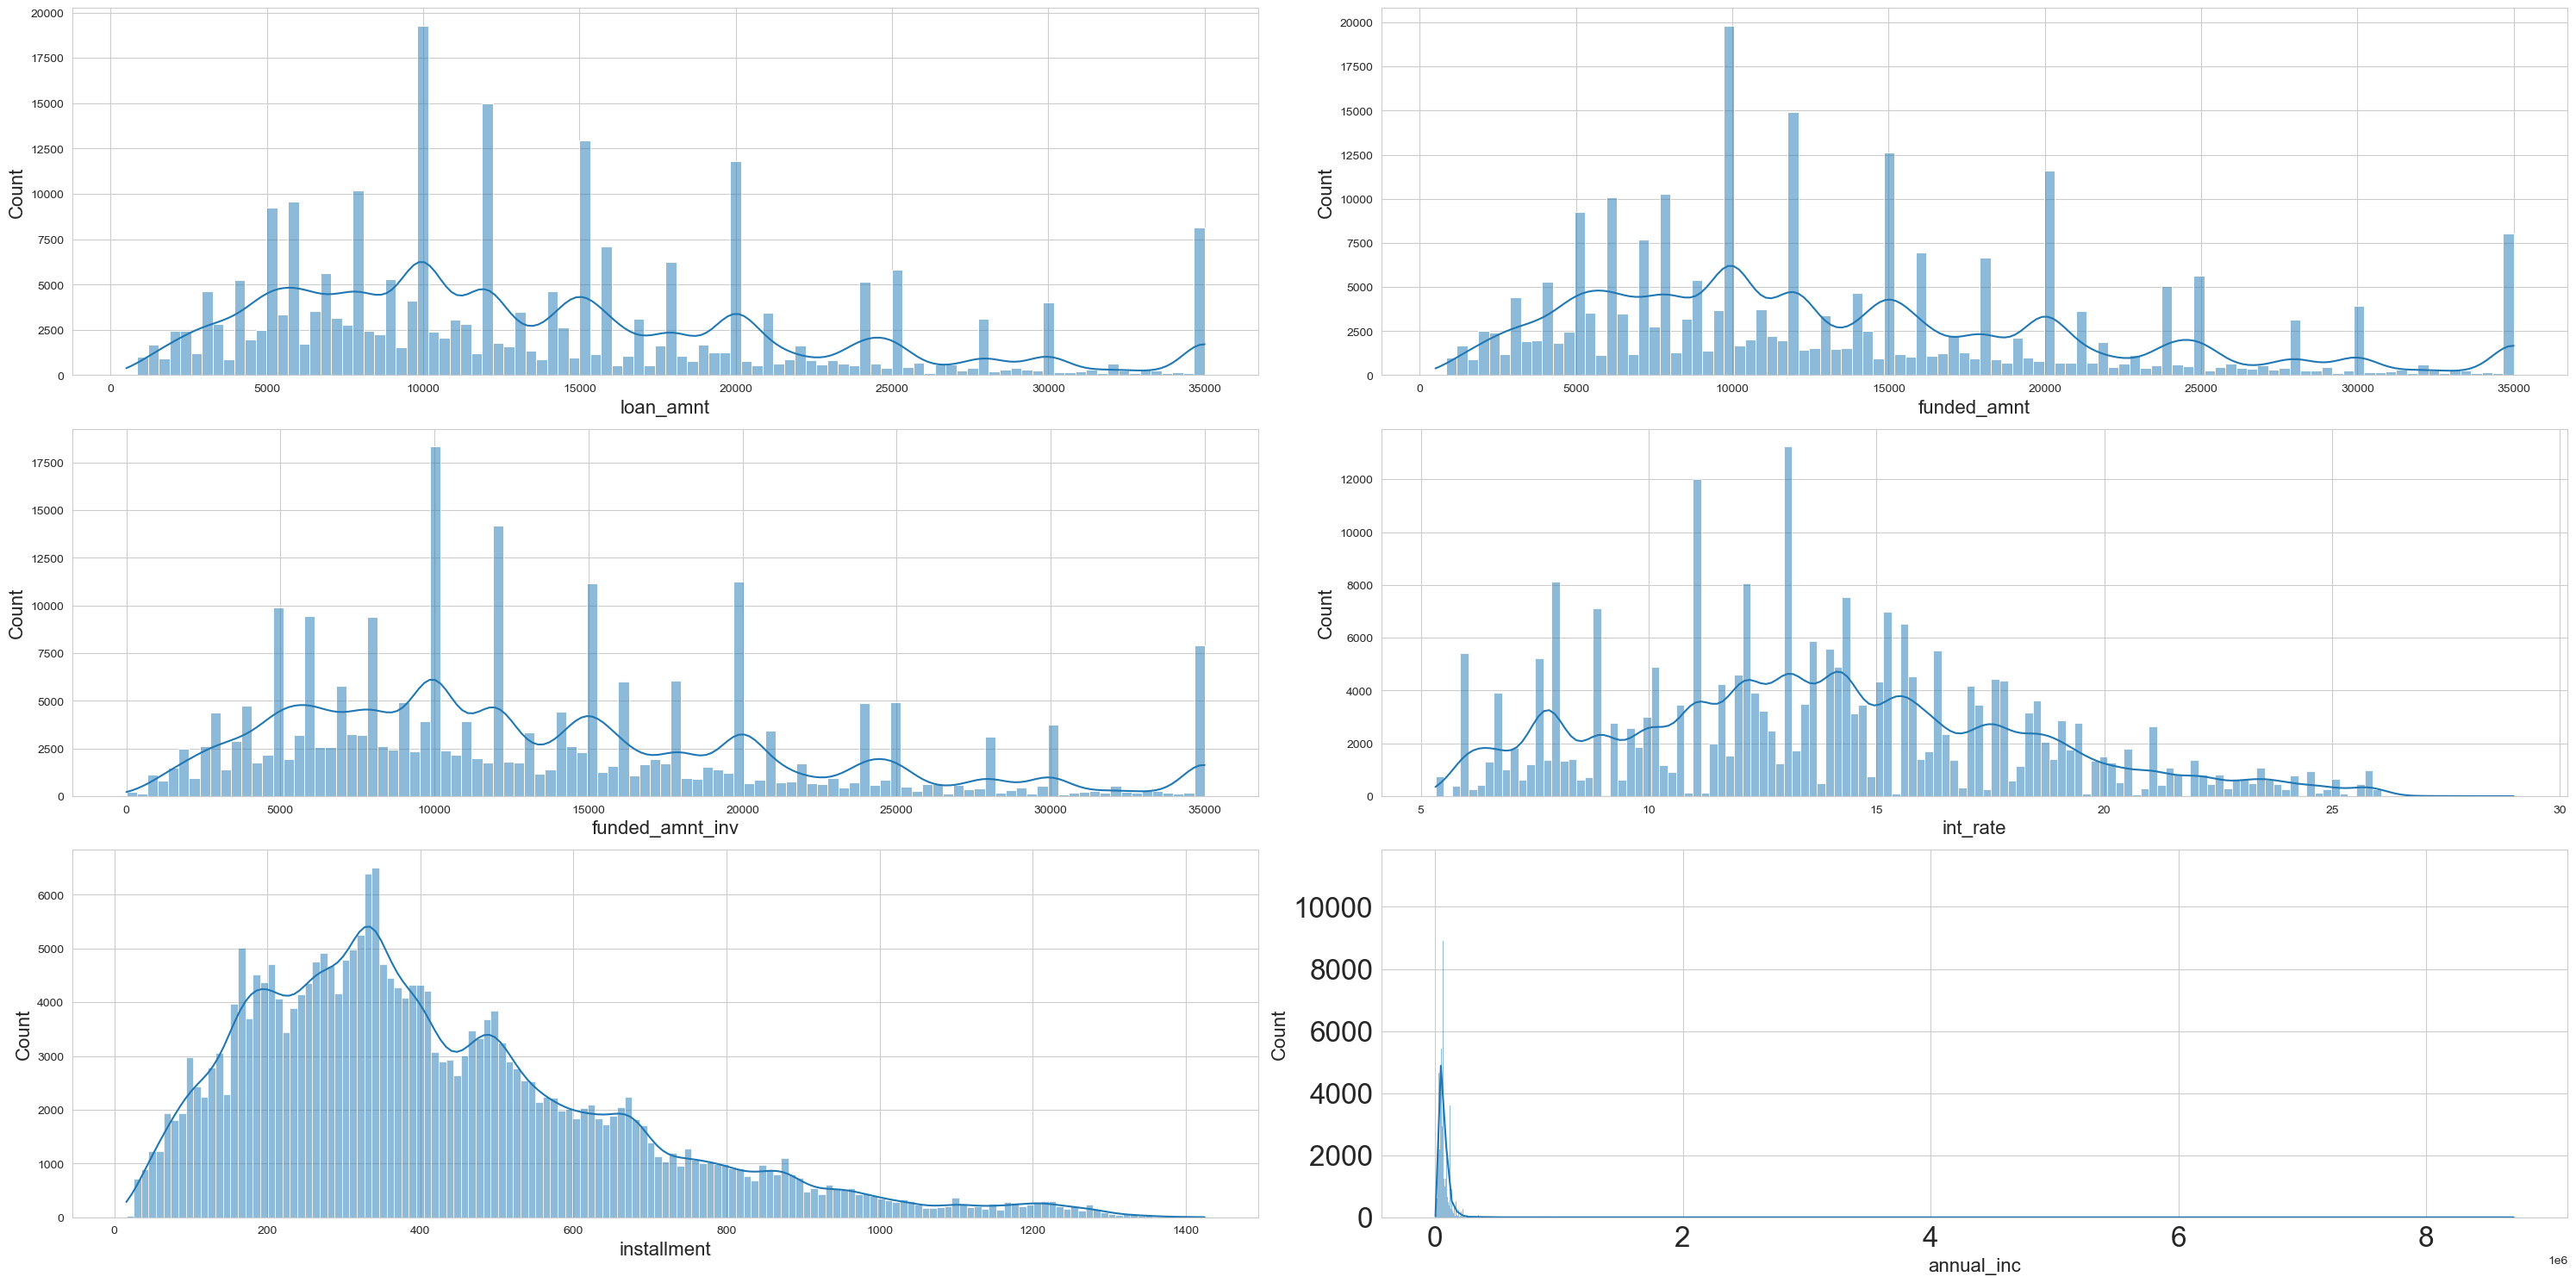

In [1303]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(30, 15))
axs = axs.flatten()

for row, var in enumerate(numeric.columns[:6]):
    sns.histplot(data=df1, x=var, kde=True, ax=axs[row])
    plt.tick_params(axis='both', which='major', labelsize=24)
    axs[row].set_xlabel(f'{var}', fontsize=16)  
    axs[row].set_ylabel('Count', fontsize=16)   
    axs[row].grid(True)
    
        
   
plt.tight_layout()

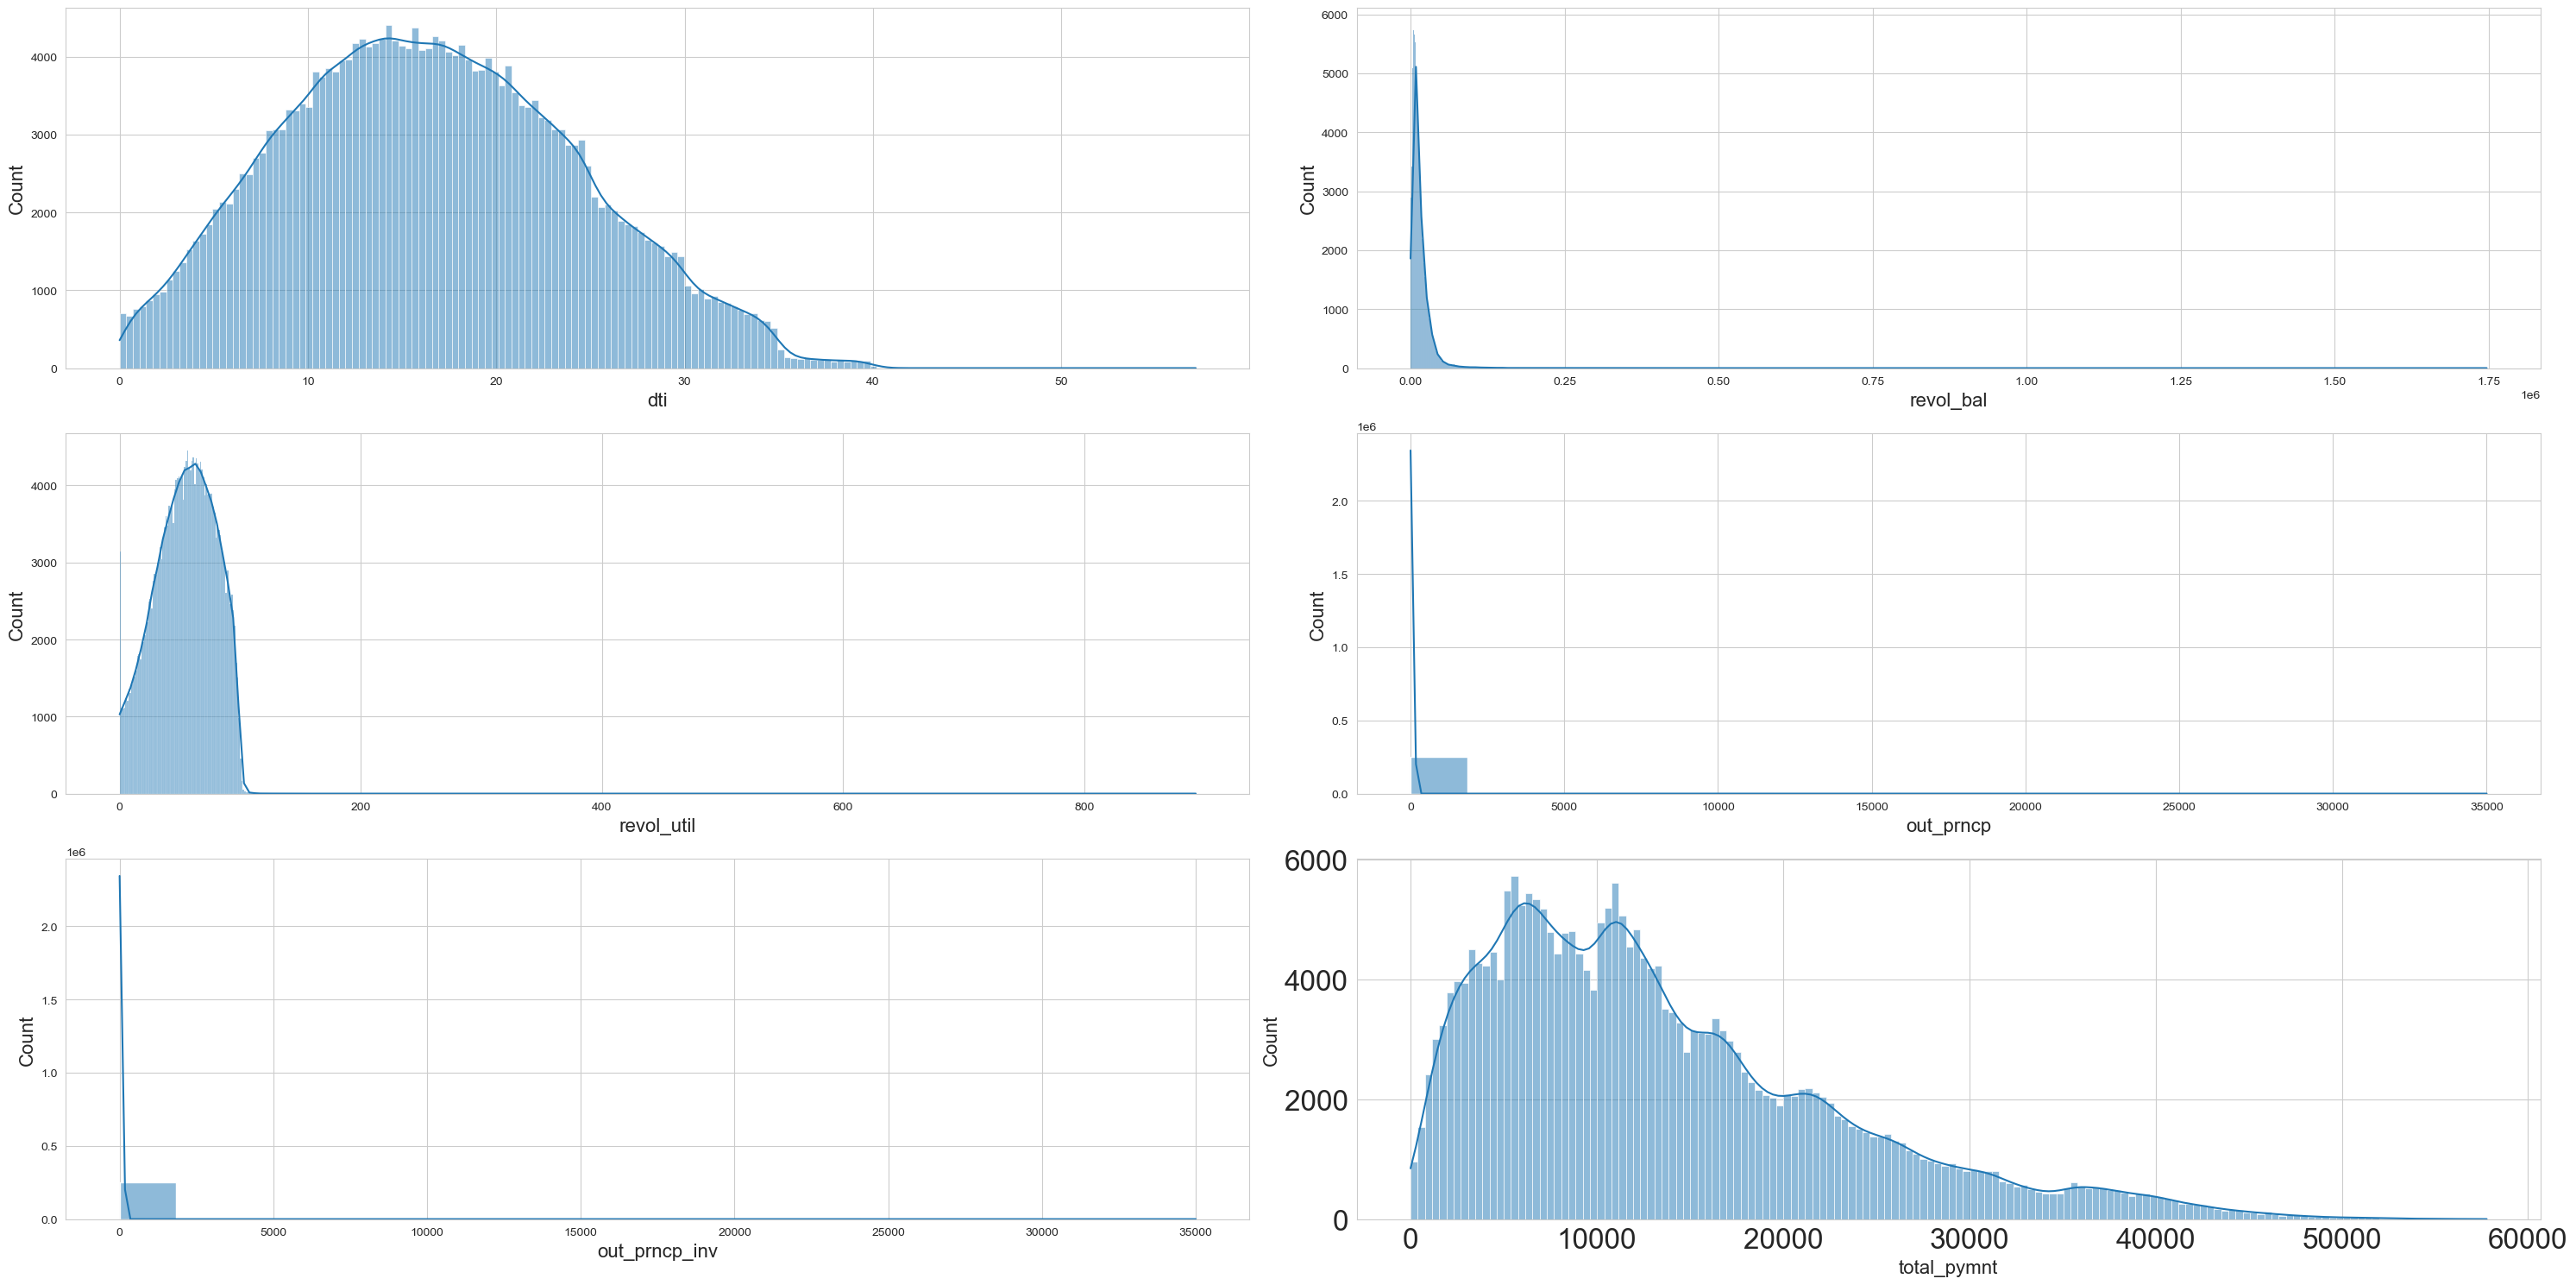

In [1304]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(30, 15))
axs = axs.flatten()

for row, var in enumerate(numeric.columns[6:12]):
    sns.histplot(data=df1, x=var, kde=True, ax=axs[row])
    plt.tick_params(axis='both', which='major', labelsize=24)
    axs[row].set_xlabel(f'{var}', fontsize=16)  
    axs[row].set_ylabel('Count', fontsize=16)   
    axs[row].grid(True)
    
        
   
plt.tight_layout()

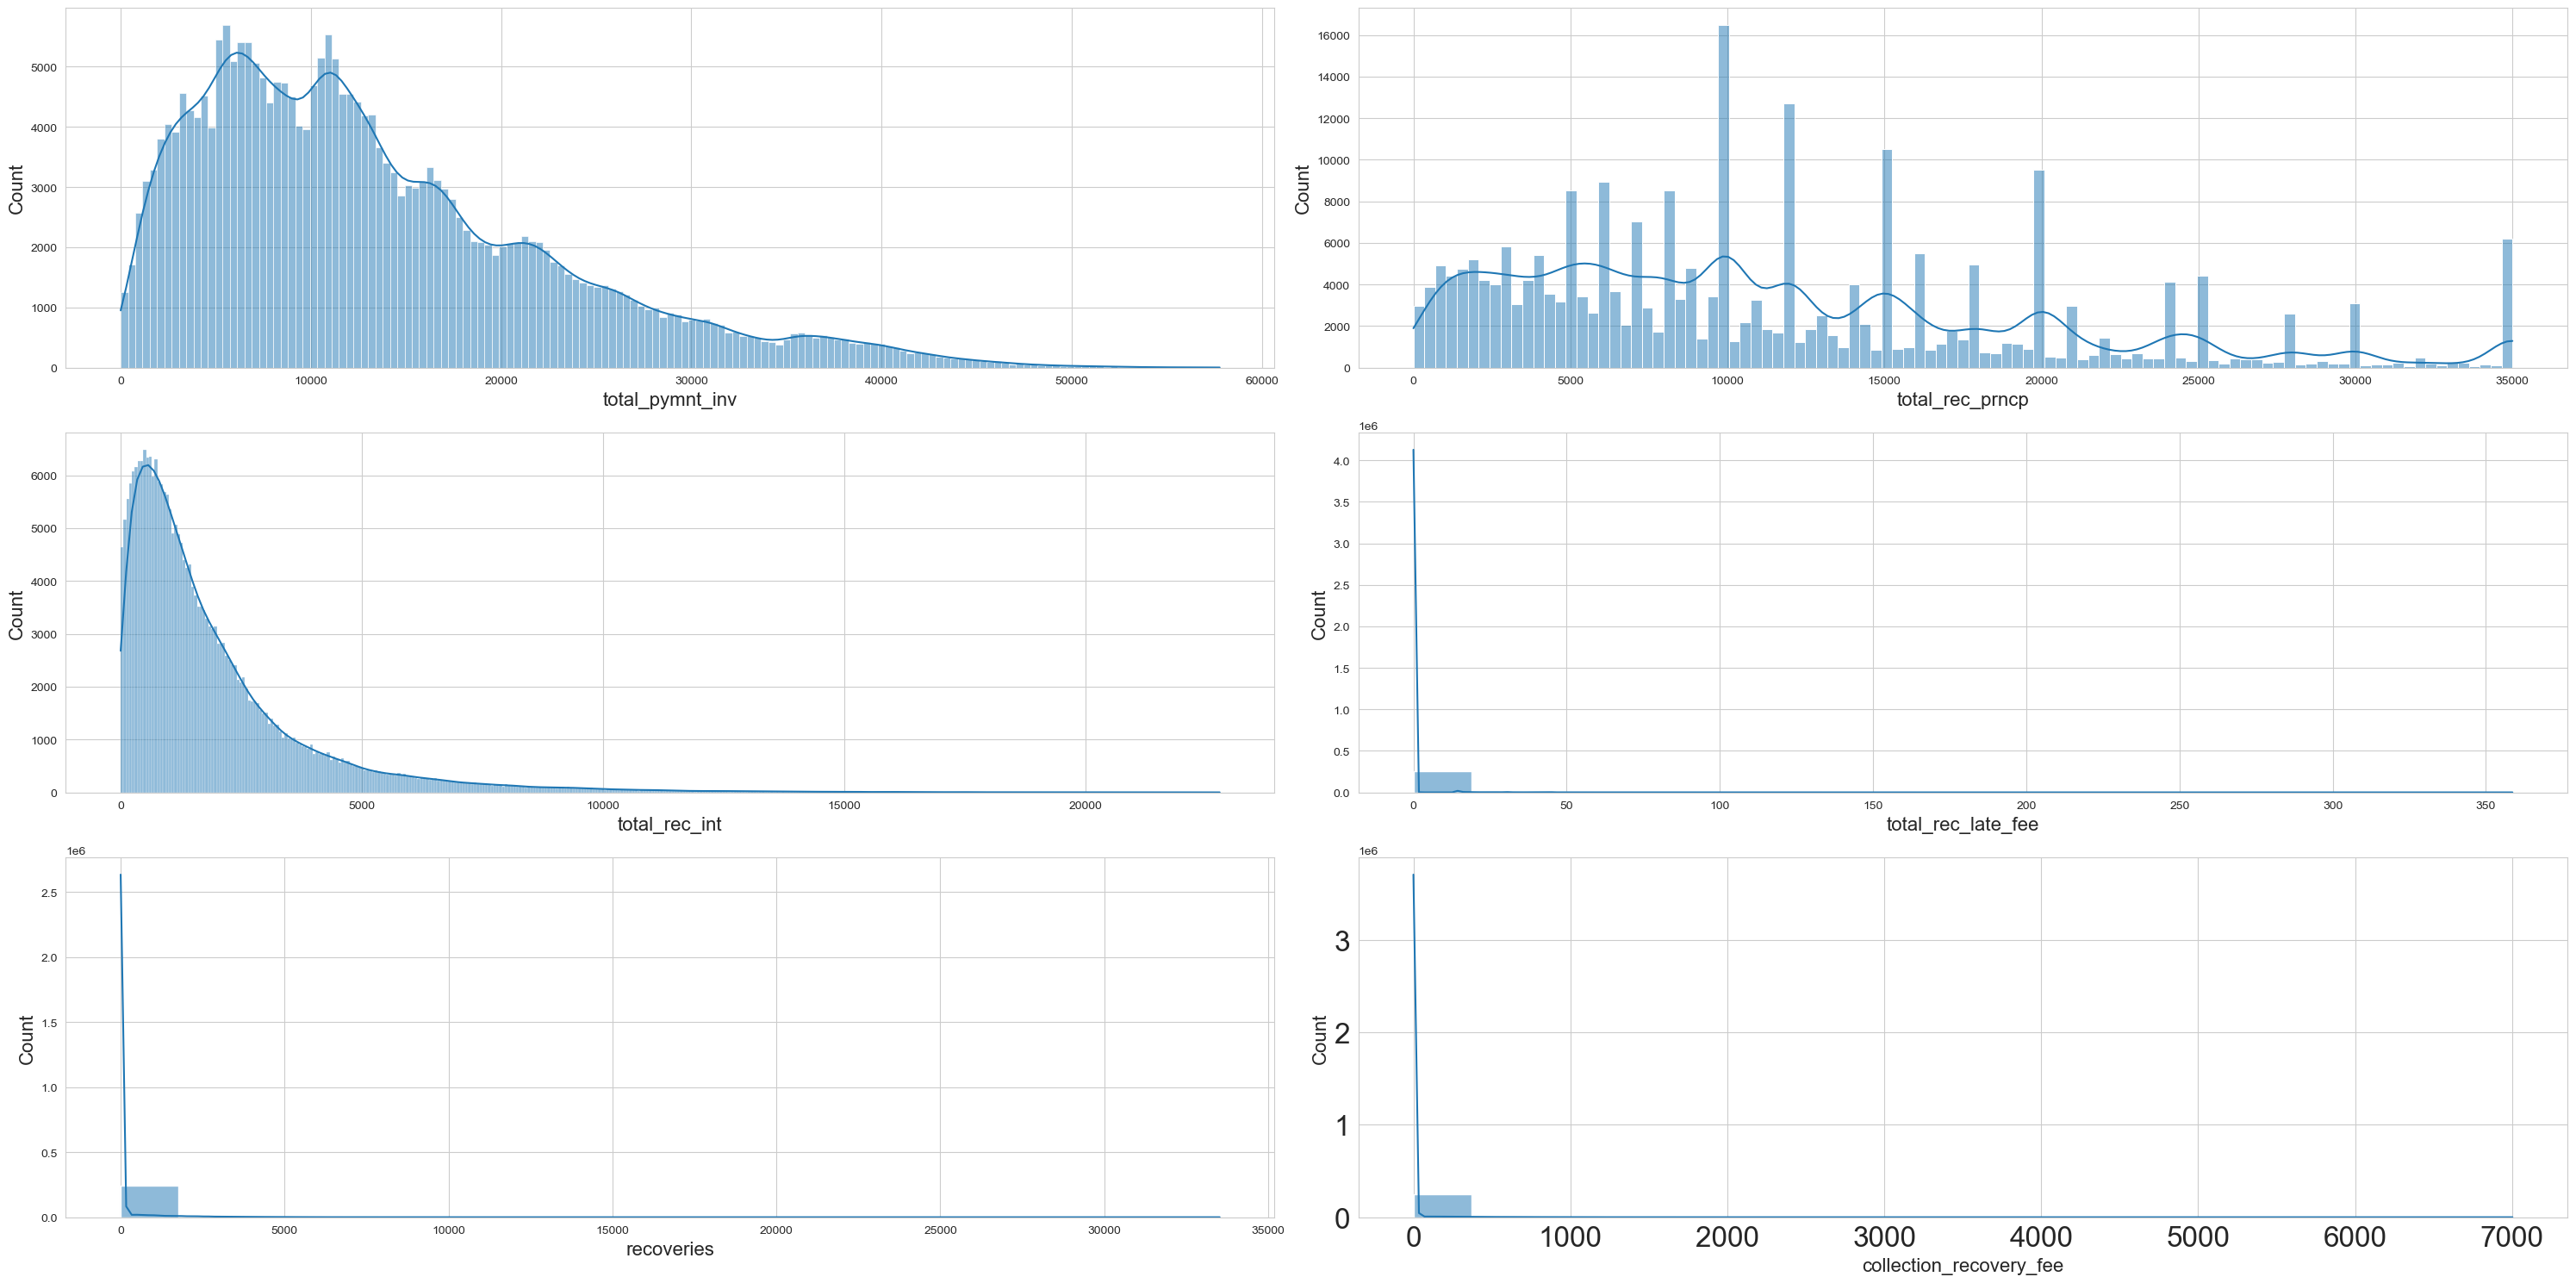

In [1312]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(30, 15))
axs = axs.flatten()

for row, var in enumerate(numeric.columns[12:18]):
    sns.histplot(data=df1, x=var, kde=True, ax=axs[row])
    plt.tick_params(axis='both', which='major', labelsize=24)
    axs[row].set_xlabel(f'{var}', fontsize=16)  
    axs[row].set_ylabel('Count', fontsize=16)   
    axs[row].grid(True)
    
        
   
plt.tight_layout()

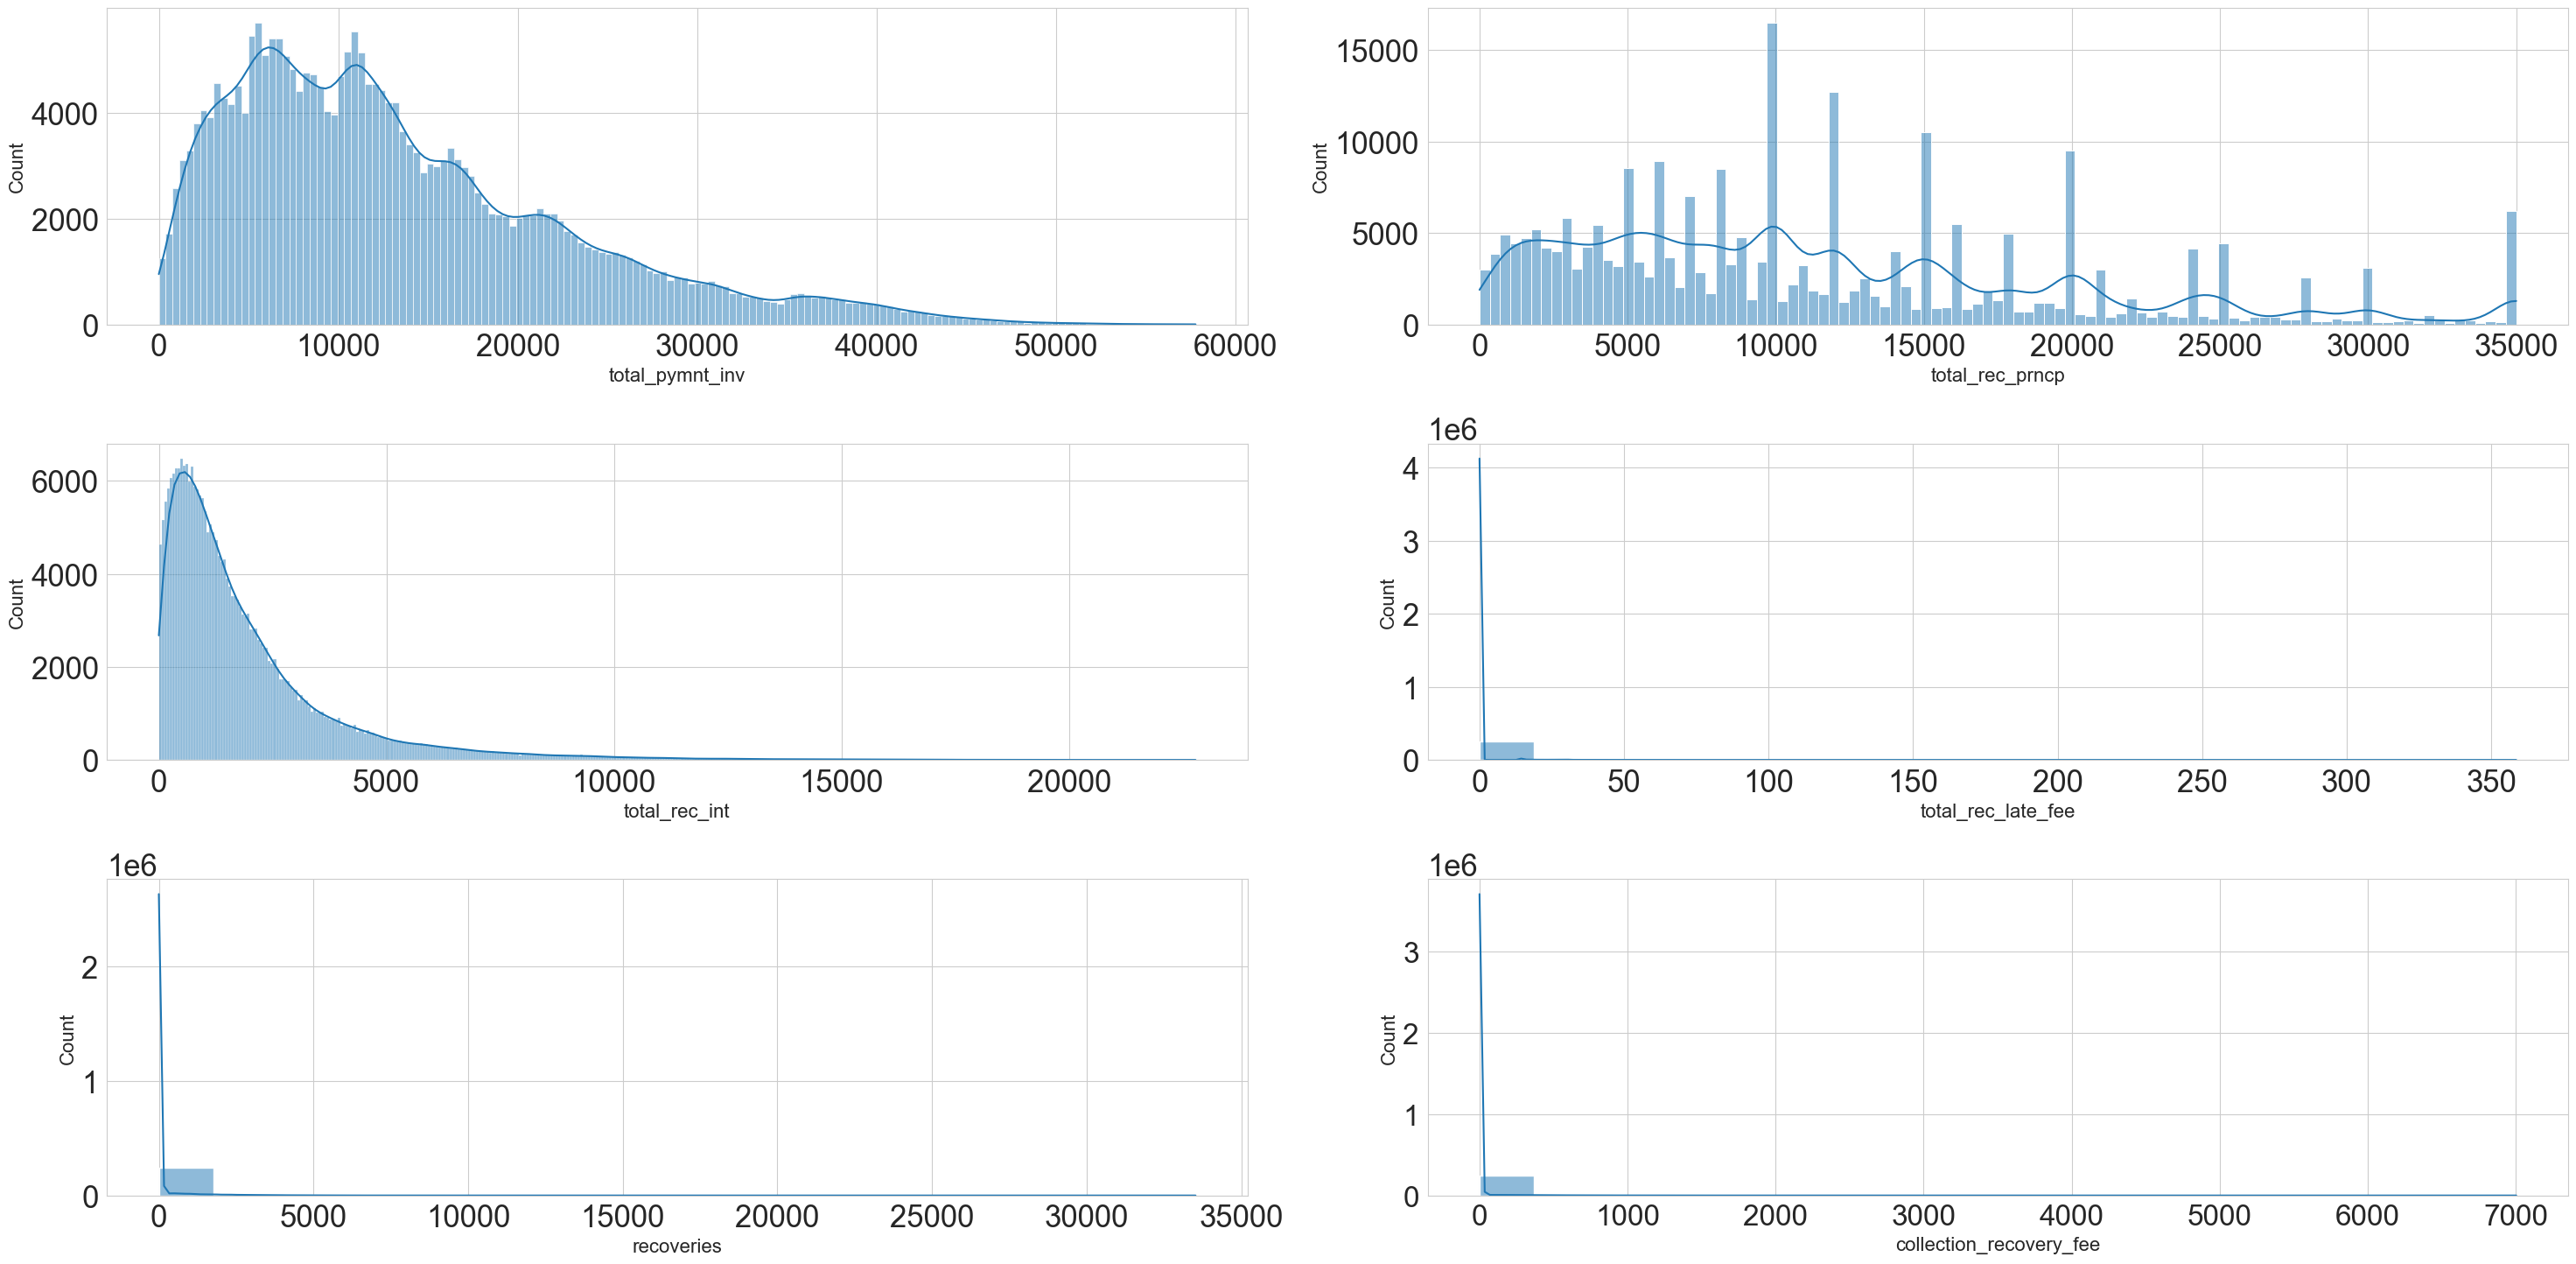

In [1362]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(30, 15))
axs = axs.flatten()

for row, var in enumerate(numeric.columns[18:24]):
    sns.histplot(data=df1, x=var, kde=True, ax=axs[row])
    plt.tick_params(axis='both', which='major', labelsize=24)
    axs[row].set_xlabel(f'{var}', fontsize=16)  
    axs[row].set_ylabel('Count', fontsize=16)   
    axs[row].grid(True)
    
        
   
plt.tight_layout()

Text(0.5, 0, 'sub_regions')

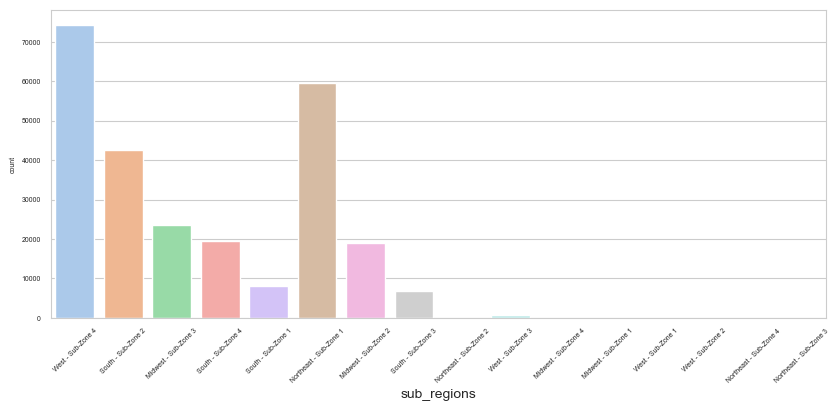

In [1397]:
plt.rc('font', size=5)
plt.figure(figsize = (10,4))
sns.countplot(df1, x = 'sub-regions',palette= 'pastel')
plt.tick_params('x', rotation = 45)
plt.xlabel('sub_regions', fontsize = 10)

Text(0.5, 0, 'sub_grade')

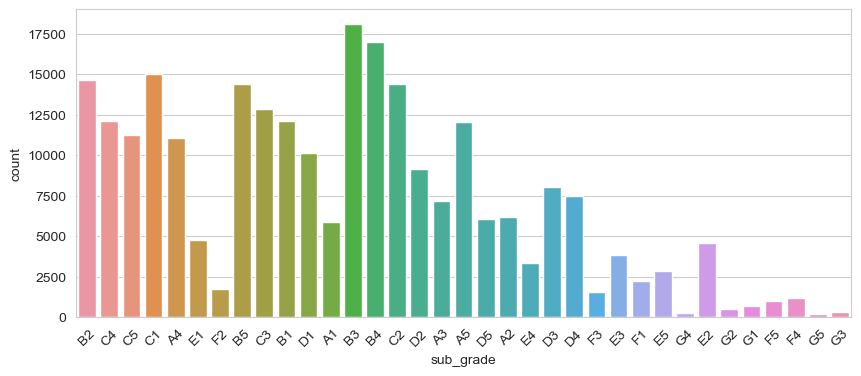

In [1389]:
plt.rc('font', size=10)
plt.figure(figsize = (10,4))
sns.countplot(df1, x = 'sub_grade')
plt.tick_params('x', rotation = 45)
plt.xlabel('sub_grade', fontsize = 10)

Text(0.5, 0, 'emp_length')

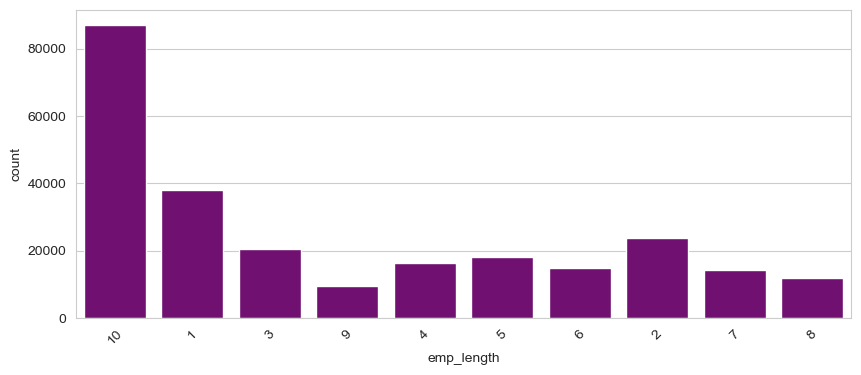

In [1405]:
plt.rc('font', size=10)
plt.figure(figsize = (10,4))
sns.countplot(df1, x = 'emp_length',color = 'purple')
plt.tick_params('x', rotation = 45)
plt.xlabel('emp_length', fontsize = 10)

Text(0.5, 0, 'purpose')

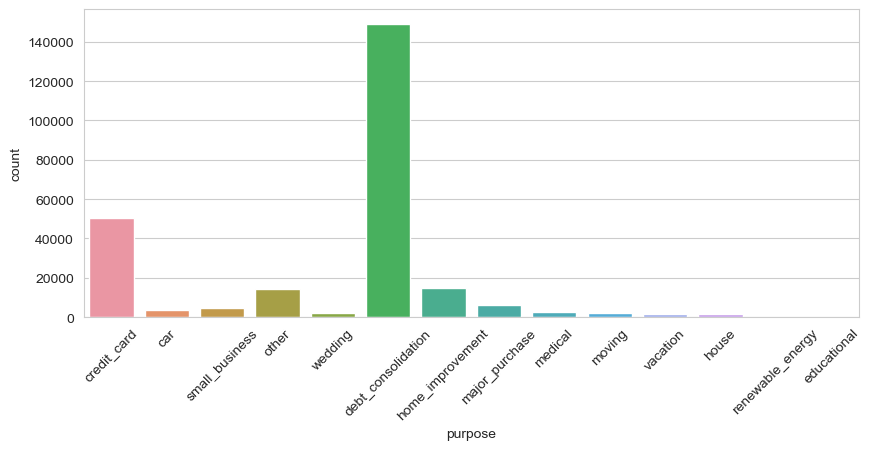

In [1406]:
plt.rc('font', size=10)
plt.figure(figsize = (10,4))
sns.countplot(df1, x = 'purpose')
plt.tick_params('x', rotation = 45)
plt.xlabel('purpose', fontsize = 10)

Text(0.5, 0, 'home_ownership')

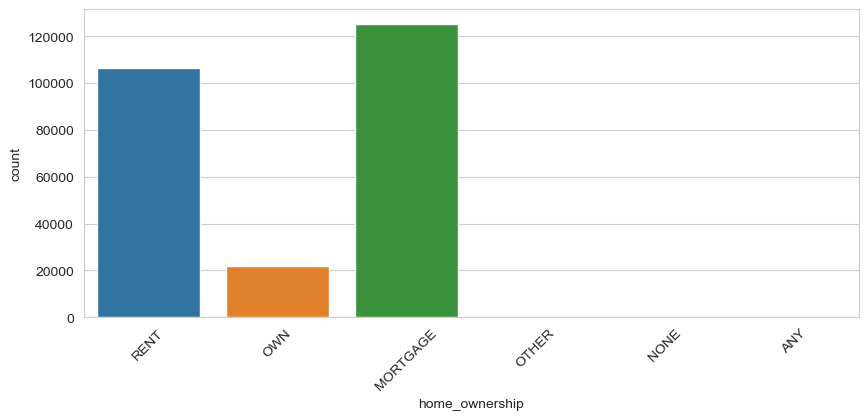

In [1407]:
plt.rc('font', size=10)
plt.figure(figsize = (10,4))
sns.countplot(df1, x = 'home_ownership')
plt.tick_params('x', rotation = 45)
plt.xlabel('home_ownership', fontsize = 10)

In [1398]:
cat.columns

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'title', 'initial_list_status',
       'region', 'sub-regions', 'emp_title_fe'],
      dtype='object')

# Bivariate analysis

In [1313]:
def count_plot(data,x,y):
    sns.countplot(data  = data, x = x, hue = y)
    plt.title(f'Distributon of {x} with {y}  ')
    

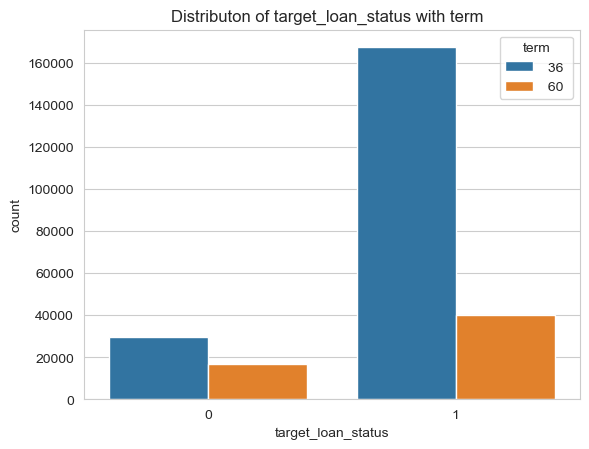

In [1315]:
count_plot(df1,'target_loan_status','term')

In [1316]:
import warnings
warnings.filterwarnings('ignore')

In [581]:
df1['loan_stat_enco'] = df1['loan_stat_enco'].astype('object')

In [619]:
def count_pl(data,x,y):
    sns.countplot(data = data,x = x ,hue = y)
   # plt.text(x = 6, y = 4, s = 6)
    #plt.text(i, y[i], y[i], ha = 'center')
    plt.tight_layout()

In [1319]:
cat = df1.select_dtypes(include = ['object'])

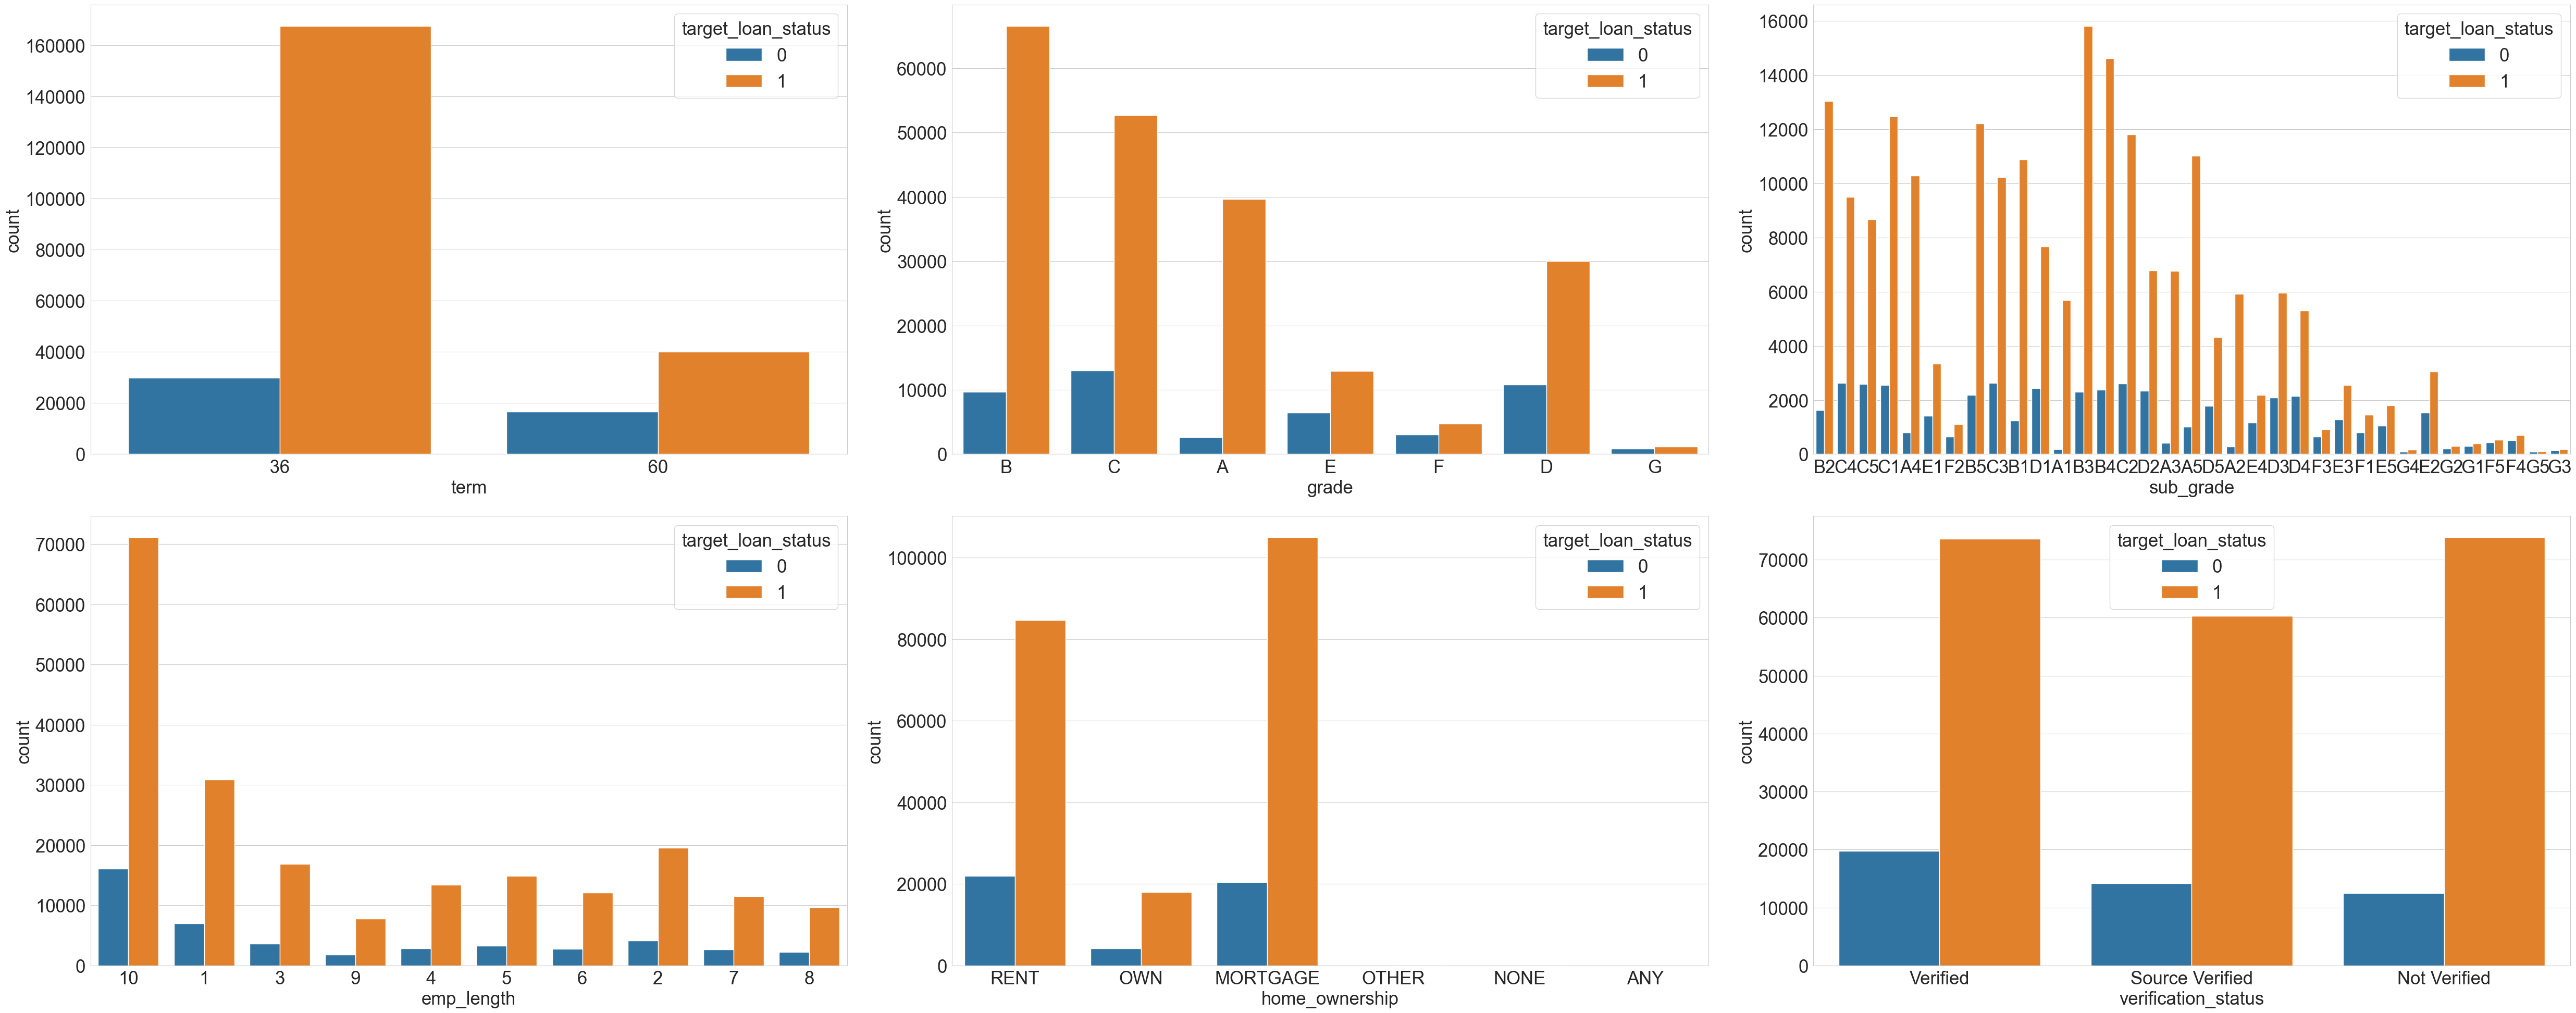

In [1338]:
plt.rc('font', size=25)
fig,axs = plt.subplots(nrows = 2, ncols = 3,figsize = (50,20))
axs = axs.flatten()
for row, var in enumerate(cat.columns[:6]):
    sns.countplot(data = df1,x = var ,hue ='target_loan_status', ax = axs[row])
    plt.tight_layout()



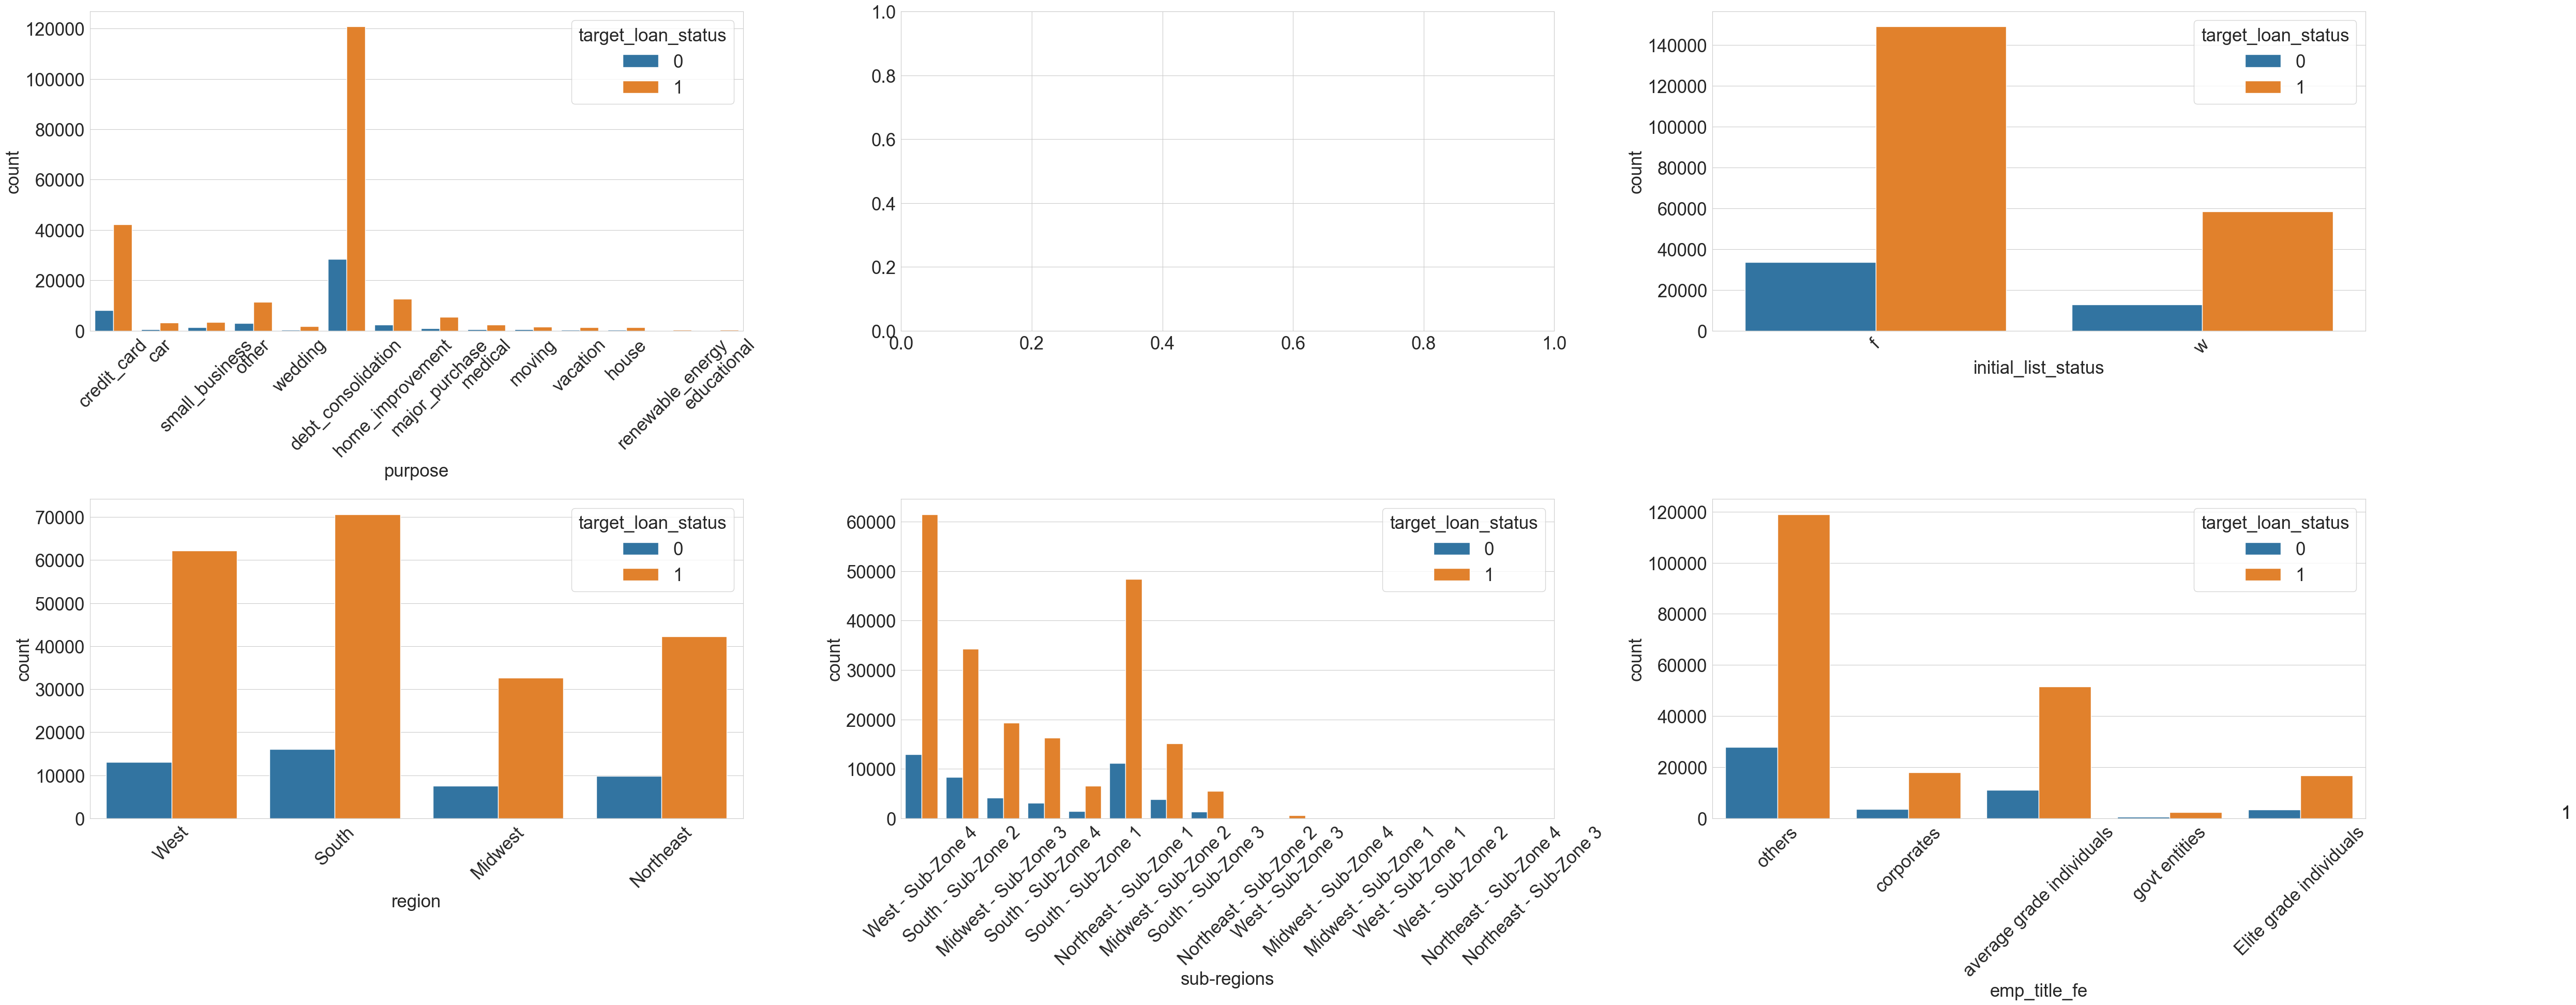

In [1341]:
plt.rc('font', size=25)
fig,axs = plt.subplots(nrows = 2, ncols = 3,figsize = (50,20))
axs = axs.flatten()
for row, var in enumerate(cat.columns[6:12]):
    if var == 'title':
        pass
    else:
        sns.countplot(data = df1,x = var ,hue ='target_loan_status', ax = axs[row])
        plt.text(x = 6, y = 3, s = 1)
        axs[row].tick_params(axis='x', rotation=45)
        #plt.text(i, y[i], y[i], ha = 'center')
        plt.tight_layout()

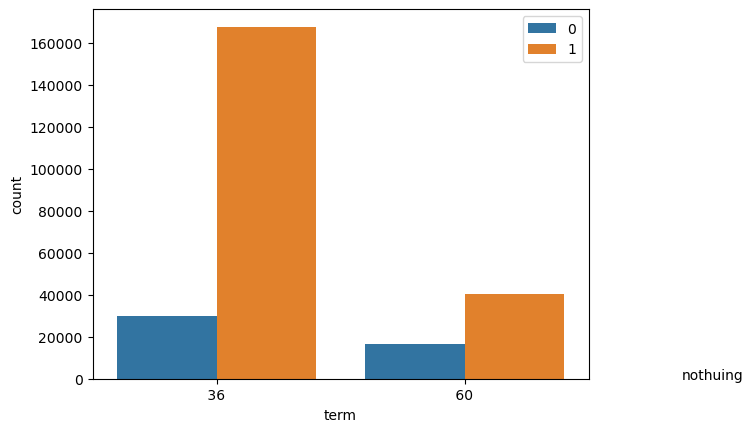

In [640]:
sns.countplot(data = df1,x ='term',hue ='loan_stat_enco')
plt.text(2, 2, 'nothuing', ha = 'center')
plt.legend()

In [1366]:
bivar_gp(df1,'region','target_loan_status',)

target_loan_status,region,Count_0,Count_1,Total,Percentage_0
0,Midwest,7536,32597,40133,18.777565
1,Northeast,9811,42263,52074,18.840496
2,South,16089,70678,86767,18.542764
3,West,13031,62185,75216,17.324771


In [1367]:
bivar_gp(df1,'sub-regions','target_loan_status',)

target_loan_status,sub-regions,Count_0,Count_1,Total,Percentage_0
0,Midwest - Sub-Zone 1,1,7,8,12.500000
1,Midwest - Sub-Zone 2,3790,15132,18922,20.029595
2,Midwest - Sub-Zone 3,4196,19280,23476,17.873573
3,Midwest - Sub-Zone 4,0,10,10,0.000000
4,Northeast - Sub-Zone 1,11141,48441,59582,18.698600
5,Northeast - Sub-Zone 2,4,10,14,28.571429
6,Northeast - Sub-Zone 3,2,2,4,50.000000
7,Northeast - Sub-Zone 4,2,13,15,13.333333
8,South - Sub-Zone 1,1473,6572,8045,18.309509
9,South - Sub-Zone 2,8323,34247,42570,19.551327


In [1123]:
bivar_gp(new_df,'emp_title_fe','loan_stat_enco',)

loan_stat_enco,emp_title_fe,Count_0,Count_1,Total,Percentage_0
0,Elite grade individuals,3465,16816,20281,17.084956
1,average grade individuals,11034,51508,62542,17.642544
2,corporates,3672,18031,21703,16.919320
3,govt entities,480,2356,2836,16.925247
4,others,27816,119012,146828,18.944615


In [1368]:
bivar_gp(df1,'purpose','target_loan_status',)

target_loan_status,purpose,Count_0,Count_1,Total,Percentage_0
0,car,458,3198,3656,12.527352
1,credit_card,8059,42250,50309,16.019003
2,debt_consolidation,28389,120764,149153,19.033476
3,educational,56,269,325,17.230769
4,home_improvement,2316,12660,14976,15.464744
5,house,293,1366,1659,17.661242
6,major_purchase,888,5391,6279,14.142379
7,medical,584,2285,2869,20.355525
8,moving,436,1603,2039,21.383031
9,other,3001,11341,14342,20.924557


# Insights

* Here, we can see that the highest number of defaulters are from the group who borrowed loan for 'small_business purpose, followed by moving, medical,renewable_energy,, with each passing 20% mark, which signifies that out of  all the loan that has been borrowed under that partciular purpose has, 20% turned out to be defaulters.

In [1364]:
bivar_gp(df1,'grade','target_loan_status',)

target_loan_status,grade,Count_0,Count_1,Total,Percentage_0
0,A,2664,39679,42343,6.291477
1,B,9717,66546,76263,12.741434
2,C,13002,52678,65680,19.795981
3,D,10798,30020,40818,26.454015
4,E,6459,12928,19387,33.316140
5,F,3013,4726,7739,38.932679
6,G,814,1146,1960,41.530612


#  Insights

* We can see clearly that as grades are degrading, percentage of defaulters are getting increased significantly.
* It can be seen that grade A, and B has comparatively smaller % of defaulters, while F and G has the  highest with 38% and  41.53% percent of defaulters.
* BUt here, major issue seems to be with grade C and D,both combined accumulates approximately to 35% of total data, and thier default percentage is also somewhere arond 20%.


In [1369]:
cat.columns

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'title', 'initial_list_status',
       'region', 'sub-regions', 'emp_title_fe'],
      dtype='object')

In [1375]:
bivar_gp(df1,'home_ownership','target_loan_status',)

target_loan_status,home_ownership,Count_0,Count_1,Total,Percentage_0
0,ANY,0,1,1,0.000000
1,MORTGAGE,20376,104966,125342,16.256323
2,NONE,7,36,43,16.279070
3,OTHER,27,114,141,19.148936
4,OWN,4135,17960,22095,18.714641
5,RENT,21922,84646,106568,20.570903


In [1373]:
bivar_gp(df1,'emp_length','target_loan_status',)

target_loan_status,emp_length,Count_0,Count_1,Total,Percentage_0
0,1,7001,30925,37926,18.459632
1,10,16104,71120,87224,18.462808
2,2,4119,19528,23647,17.418700
3,3,3638,16846,20484,17.760203
4,4,2841,13422,16263,17.469102
5,5,3280,14856,18136,18.085576
6,6,2758,12058,14816,18.615011
7,7,2673,11483,14156,18.882453
8,8,2227,9695,11922,18.679752
9,9,1826,7790,9616,18.989185


In [1374]:
bivar_gp(df1,'initial_list_status','target_loan_status',)

target_loan_status,initial_list_status,Count_0,Count_1,Total,Percentage_0
0,f,33601,149146,182747,18.386622
1,w,12866,58577,71443,18.008762


In [1370]:
bivar_gp(df1,'verification_status','target_loan_status',)

target_loan_status,verification_status,Count_0,Count_1,Total,Percentage_0
0,Not Verified,12486,73856,86342,14.461097
1,Source Verified,14202,60271,74473,19.069999
2,Verified,19779,73596,93375,21.182329


# Insights

* Seems like,  some serious issues persists in their income verifciation check process at Lending Club, becuase the highest number of defualters belong to the the source verified and verified category, while the defualters who wasn't verified , has 14.46% of default ratio, comparatively to that of 19% and 21.18%.

In [1376]:
bivar_gp(df1,'sub_grade','target_loan_status',)

target_loan_status,sub_grade,Count_0,Count_1,Total,Percentage_0
0,A1,181,5689,5870,3.083475
1,A2,283,5925,6208,4.558634
2,A3,406,6774,7180,5.654596
3,A4,790,10279,11069,7.137049
4,A5,1004,11012,12016,8.355526
5,B1,1242,10883,12125,10.243299
6,B2,1619,13035,14654,11.048178
7,B3,2297,15809,18106,12.686402
8,B4,2382,14610,16992,14.018362
9,B5,2177,12209,14386,15.132768


In [1377]:
bivar_gp(df1,'term','target_loan_status',)

target_loan_status,term,Count_0,Count_1,Total,Percentage_0
0,36,29798,167575,197373,15.097303
1,60,16669,40148,56817,29.338050


# Inisghts

* borrowers whose loan repayment period is 60 months turned to be dafulting more comaparatively to that with 36 months of period.